# Sber Russian housing market

**Цель проекта** - предсказать цену квартиры

**Задачи:**
 - Погрузиться в тему проекта
 - Понять какие нюансы встречаются на этапе очистки данных и генерации новых фичей
 - Изучить какие признаки лучше использовать при решении подобных задач
 - Подготовить набор данных для обучения модели
 - Построить ряд моделей и провести их валидацию

# Import

## Замечания 

### (Alex Ryzhkov, 23/03/2022)

***Замечание 1.*** Не совсем понятно почему у катбуста стоит eval_metric MAPE если в задаче метрика рмсле + если ты делаешь предварительно преобразование таргета через логарифм, то получается что оптимизировать тебе нужно RMSE внутри или что тоже самое MSE

***Необходимо***: 

- Поправить в catboost eval_metric на RMSE <span style="color:green">**(Выполнено)**</span>.

***Замечание 2.*** При преобразовании таргета через логарифм обычно стоит на всякий пожарный специально проверить что там нет отрицательных значений и само преобразование таргета общеупотребительное это log(x + 1) и exp(pred) - 1

***Необходимо***: 

 - Поправить преобразование таргета на log(x + 1) и exp(pred) - 1 <span style="color:green">**(Выполнено)**</span>.

***Замечание 3.*** Сейчас по сравнению между собой катбуста и ламы получилась не совсем наверное честная история - катбуст учится по 85% данных и стопается по оставшимся 15, а лама учится по всему датасету полностью и скор ее показывается по всему трейн-таргету против ооф предсказаний. то есть сравнивать мы их можем получается только на публичном лб

***Необходимо***: 

 - откусить от исходного датасета кусок в 20% и работать с ним как с совсем тестовым датасетом (предиктить финальными полученными моделями как на него, так и на реальный тест), а вот уже по оставшимся 80% проводить обучение моделей <span style="color:green">**(Выполнено)**</span>.
 - обернуть катбуст тоже в 5фолд кроссвалидацию и строить ооф  <span style="color:purple">**(Отложено)**</span>.
    

***Замечание 4.*** Если я правильно вижу (к сожалению нет логов запуска самого катбуста и отладочной печати чтобы понимать размеры датасетов), то в катбуст уходят ohe признаки чего делать почти категорически нельзя. + лейбл энкодер штука тоже довольно опасная, так как может добавить в данные то, чего не было в них изначально. но в целом если мне не изменяет память, то твой вариант сделать энкодинг через категории это скорее будет типа frequency энкодинга поэтому мб не так страшно

***Необходимо***: 

 -  реализовать target_mean_encoding с добавлением регуляризации (кросс валидация и/или размытие) <span style="color:green">**(Выполнено)**</span>. 

### (Leonid Sanochkin, 25/04/2022, 04/05/2022)

***Замечание 5.*** Отсутствует baseline у проекта. Ранее было заплоанировано использовать в качестве baseline модель LightAutoML. После согласования с ментором было решено воспроизвести более простую модель. 

***Необходимо***: 

 -  реализовать baseline в виде простого предсказания цены за квартиру как усредненное значение цены по площади и микрорайону <span style="color:green">**(Выполнено)**</span>.
 
***Замечание 6.*** Есть вероятность, что для решения задачи может понадобится аугментация данных для увеличения выборки. Можно использовать библеотеку CTGAN.

***Необходимо***: 

 - разобрать пример [испорльзования библеотеки CTGAN](https://www.kaggle.com/code/gogo827jz/data-augmentation-ctgan/notebook), поискать другие примеры. <span style="color:purple">**(Отложено. Было решено сосредоточиться на реализации проекта в виде MVP - Замечание 8. Если останется время, то можно попробовать.)**</span>.
 - применить к текущему проекту. <span style="color:purple">**(Отложено. Было решено сосредоточиться на реализации проекта в виде MVP - Замечание 8. Если останется время, то можно попробовать.)**</span>.
 
***Замечание 7.*** Для улучшения метрики можно попробовать использовать ансамбль моделей, например CatBoost + LightGBM. Можно использовать также нейросеть в качестве одной из моделей. 

***Необходимо***: 

 - найти и разобрать примеры реализации построения моделей CatBoost и оптимизации гипер параметров к ним  <span style="color:green">**(Выполнено)**</span>.
 - найти и разобрать примеры реализации построения моделей LightGBM или XGBoost и оптимизации гипер параметров к ним <span style="color:purple">**(Отложено)**</span>.
 - разобрать [пример работы с уже предобученными сетями TabNet](https://www.kaggle.com/code/carlmcbrideellis/tabnet-simple-binary-classification-example/notebook). Поискать другие примеры. <span style="color:purple">**(Отложено. Было решено сосредоточиться на реализации проекта в виде MVP - Замечание 8. Если останется время, то можно попробовать.)**</span>.
 - применить к проекту <span style="color:purple">**(Отложено. Было решено сосредоточиться на реализации проекта в виде MVP - Замечание 8. Если останется время, то можно попробовать.)**</span>.

***Замечание 8.*** Непонятно, в каком ключе будет реализован проект. Изначально мне была поставлена вполне бизнесовая задача, а на kaggle решается соревновательная задача. Есть два подхода. В первом решается решается именно соревновательня задача - применение различных методов и техник для максимального улучшения метрики. Второй - построение достаточно примелемой модели и оформлении ее в виде некоего сервиса (MVP).

***Необходимо***:  

 - выбрать в каком ключе будет реализован проект. <span style="color:green">**(Выполнено. Решено выполнять проект в виде MVP)**</span>. 
 - необходимо продумать архетиктуру сервисов. <span style="color:green">**(Выполнено. Будет несколько сервисов, которые будут разворачиваться на сервере с помощью docker-compose. 1-й Features - имитация получения данных/признаков, например из из витрин, и передача их далее во 2-й сервис Model, откуда полученные предсказания передаются в 3-й Metrics. Пересылка сообщений происходит по 4-му  RabbitMQ)**</span>.
 - необходимо реализовать архетиктуру сервисов. <span style="color:green">**(Выполнено)**</span>. 
 
***Замечание 9.*** Что еще надо сделать точно - проанализировать одно из решений из топ-10 (или какое там максимальное место есть с расписанным решением).
 
 ***Необходимо***:  

 - найти и разобрать одно из опубликованных решений с лучшими результатами на лидерборде, например [1st place solution](https://www.kaggle.com/competitions/sberbank-russian-housing-market/discussion/35684)  <span style="color:green">**(Выполнено)**</span>.

## Идеи для обдумывания

 - В соревновании участвовал [Nigel Carpenter](https://www.kaggle.com/nigelcarpenter), он опубликовал несколько своих ноутбуков [Property location attempt 3..!](https://www.kaggle.com/code/nigelcarpenter/property-location-attempt-3), [Lat and Longitude for all locations](https://www.kaggle.com/code/nigelcarpenter/lat-and-longitude-for-all-locations/report) и [Cleaning the data using Latitude and Longitude](https://www.kaggle.com/code/nigelcarpenter/cleaning-the-data-using-latitude-and-longitude/report), в которых он смог по признакам ("mkad_km", "ttk_km", "sadovoe_km", "sub_area") вычилсить точные координаты объекта. Если есть точные координаты, то можно попробовать отыскать выбросы, разделить всю площадь Москвы на квадраты-зоны, по каждой зоне расчитать среднюю стоимость квадратного метра или стоимость по ближайщим соседям. Но есть сложность - в ноутбуках используется язык R, я его не знаю.
 

In [1]:
#!pip install -U lightautoml

In [2]:
import numpy as np 
import pandas as pd 
import os
import zipfile
import shap

from catboost import CatBoostRegressor, Pool
from sklearn import model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.metrics import mean_squared_log_error, mean_squared_error

#from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
#from lightautoml.tasks import Task

import xgboost as xgb

import seaborn as sns
color = sns.color_palette()

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

In [3]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

# SetUp

In [4]:
VERSION    = 1 # версия запуска для сохранения ответов

DATA_DIR        = '../working/'
INPUT_DATA_DIR  = '../input/sberbank-russian-housing-market/'
FILE_TRAIN      = 'train.csv'
FILE_TEST       = 'test.csv'
FILE_MACRO      = 'macro.csv'
FILE_SUB        =  'sample_submission.csv'

N_THREADS   = 4 # threads number for lightgbm and linear models
N_FOLDS     = 5 # folds number for AutoML
TIMEOUT     = 3600 # Time in seconds for automl run
TARGET_NAME = 'price_doc' # Name for target column 

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

VAL_SIZE   = 0.2   # % для разделения выборки на обучающую и тестовую

## Вспомогательные функции

In [5]:
features = [
    'id',
    'full_sq','life_sq', 'kitch_sq', 
    'num_room', 'floor_number', 'max_floor', 
    'build_year', 'state', 'product_type',
    'price_doc'
]

In [6]:
def load_data_frames():
    print('Выгрузим данные')
    # Выгружает 4 датасета
    train = pd.read_csv(DATA_DIR + FILE_TRAIN, parse_dates=['timestamp'])
    test = pd.read_csv(DATA_DIR + FILE_TEST, parse_dates=['timestamp'])
    macro = pd.read_csv(DATA_DIR + FILE_MACRO, parse_dates=['timestamp'])
    sample_submission = pd.read_csv(DATA_DIR + FILE_SUB)
    
    # Целевой переменной теста нет, поэтому занулим пока
    test['price_doc'] = 0                
    
    # Добавляем макропараметры к данным по квартирам 
    train = train.merge(macro, on='timestamp', how='left')
    test = test.merge(macro, on='timestamp', how='left')    

    return train, test, sample_submission

In [7]:
def check_column(data, column, query_string, data_type='TRAIN', print_bad_value=False):
    print('_' * 80, '\n')
    print(f'Посмотрим объявления из {data_type} по условию {query_string}')
    display(data.query(query_string)[features])
    
    if print_bad_value:
        number_of_values = data.query(query_string)[column].nunique()
        if number_of_values <= 5:
            values = list(data.query(query_string)[column].unique())
            print(f'{column} unique values:', values)
        else:
            values = np.sort(data.query(query_string)[column].unique())
            print(f'{column} unique values: {list(values[:2])} ... {list(values[-2:])}')
    print('_' * 80)

In [8]:
def correct_column(data, column, query_string, data_type='TRAIN', delete_bad_value=False, display_table=False):
    new_column = column + '_is_bad'
    if new_column not in data.columns:
        print(f'Добавим в {data_type} новый признак {new_column}')
        data[new_column] = 0
    else:
        print(f'Признак {new_column} уже добавлен в {data_type}')

    print(f'В данные {data_type} внесем коррективы, по условию {query_string}')
    bad_index = data.query(query_string).index
    print(f'Проставим 1-цу в признак {new_column}')
    data.loc[bad_index, new_column] = 1
    
    if delete_bad_value:
        print(f'Занулим признак {column}')
        data.loc[bad_index, column] = np.NaN
    
    if display_table:
        display(data.loc[bad_index, features + [new_column]])

In [9]:
def delete_rows(data_in, query_string, data_type='TRAIN'):
    data = data_in.copy()
    print(f'В данные {data_type} внесем коррективы, по условию {query_string}')
    bad_index = data.query(query_string).index
    print(f'Удалим строки, подходящие под это условие:\n\t-было строк {data.shape[0]}')
    data = data[~data.index.isin(bad_index)]
    print(f'\t-стало строк {data.shape[0]}')
    
    return data

In [10]:
def add_new_features(data_in: pd.DataFrame):
    print('Добавим новые признаки')
    data = data_in.copy()
    
    # Rename columns
    data = data.rename(columns={'floor' : 'floor_number'})
    
    # New features
    # Добавим новый призна - разница между общей площадью full_sq и суммой жилой площади life_sq и кухней kitch_sq
    data['delta_area_sq'] = data['full_sq'].add(-data['life_sq'], fill_value=0).add(-data['kitch_sq'], fill_value=0)
    
    # Добавим новый признак - соотношение жилой и общей площади
    data['rate_life_to_full_sq'] = data['life_sq'] / data['full_sq']
    
    # Добавим новый признак - соотношение площади кухни и общей площади
    data['rate_kitch_to_full_sq'] = data['kitch_sq'] / data['full_sq']
    
    # Добавим новый признак - средня площадь комнат
    data['mean_room_sq'] = data['full_sq'] / data['num_room']
    
    # Добавим новый признак - соотношение этажа квартиры и к общей этажности здания
    data['rate_floor_to_max_floor'] = data['floor_number'] / data['max_floor']
    
    # Добавим новый признак - Довоенные постройки
    data['build_is_old'] = 0
    bad_index = data[data['build_year'] <= 1945].index
    data.loc[bad_index, 'build_is_old'] = 1
        
    # Добавим несколько категориальных признаков
    cut_bins = [-1, 10, 17, 25, 60, 720]
    data['metro_id_and_min_walk'] = data['ID_metro'].astype(str) + '_' +\
        pd.cut(data['metro_min_walk'], bins=cut_bins).astype(str)
    data['sub_area_and_metro_min_walk'] = data['sub_area'] + '_' +\
        pd.cut(data['metro_min_walk'], bins=cut_bins).astype(str) 
    
    # Добавим несколько признаков
    data['room_size'] = data['life_sq'] / data['num_room'].astype(float)
    data['male_p']   = data['male_f']   / data['full_all']
    data['female_p'] = data['female_f'] / data['full_all']
    data['young_male_p']   = data['young_male']   / data['young_all']
    data['young_female_p'] = data['young_female'] / data['young_all']
    data['work_male_p']   = data['work_male']   / data['work_all']
    data['work_female_p'] = data['work_female'] / data['work_all']
    data['ekder_male_p']   = data['ekder_male']   / data['ekder_all']
    data['ekder_female_p'] = data['ekder_female'] / data['ekder_all']
    data['0_6_male_p']   = data['0_6_male']   / data['0_6_all']
    data['0_6_female_p'] = data['0_6_female'] / data['0_6_all']
    data['7_14_male_p']   = data['7_14_male']   / data['7_14_all']
    data['7_14_female_p'] = data['7_14_female'] / data['7_14_all']
    data['0_17_male_p']   = data['0_17_male']   / data['0_17_all']
    data['0_17_female_p'] = data['0_17_female'] / data['0_17_all']
    data['16_29_male_p']   = data['16_29_male']   / data['16_29_all']
    data['16_29_female_p'] = data['16_29_female'] / data['16_29_all']
    data['0_13_male_p']   = data['0_13_male']   / data['0_13_all']
    data['0_13_female_p'] = data['0_13_female'] / data['0_13_all']
    data['young_p'] = data['young_all'] / data['full_all']
    data['work_p']  = data['work_all']  / data['full_all']
    data['ekder_p'] = data['ekder_all'] / data['full_all']
    data['0_6_p']   = data['0_6_all']   / data['full_all']
    data['7_14_p']  = data['7_14_all']  / data['full_all']
    data['0_17_p']  = data['0_17_all']  / data['full_all']
    data['16_29_p'] = data['16_29_all'] / data['full_all']
    data['0_13_p']  = data['0_13_all']  / data['full_all']
    
    return data

In [11]:
def clean_data(data_in: pd.DataFrame, data_type: str):
    print('Почистим данные')
    data = data_in.copy()
    
    full_sq_max = 1000
    full_sq_min = 5
    life_sq_max = 1000
    life_sq_min = 5
    kitch_sq_max = 200
    kitch_sq_min = 1.1
    delta_area_sq_min = 0
    rate_life_to_full_sq_max = 1
    rate_kitch_to_full_sq_max = 1
    num_room_max = 9
    num_room_min = 1
    mean_room_sq_max = 60
    mean_room_sq_min = 10
    floor_number_min = 1
    max_floor_min = 1
    rate_floor_to_max_floor_max = 1
    build_year_max = 2020
    build_year_min = 1690
    state_max = 30
    
    # Only for train data
    if data_type == 'TRAIN':
        query_string = f'full_sq > {full_sq_max}'
        data = delete_rows(data, query_string, data_type)
        
        query_string = '(full_sq == 1 and life_sq == 1) or (full_sq == 0 and life_sq == 0)'
        data = delete_rows(data, query_string, data_type)
        
        query_string = f'life_sq > {life_sq_max}'
        data = delete_rows(data, query_string, data_type)
        
        bad_index = data[data['build_year'] == 215].index
        data.loc[bad_index, 'build_year'] = 2015
        
        bad_index = data[data['child_on_acc_pre_school'] == '#!'].index
        data.loc[bad_index, 'child_on_acc_pre_school'] = np.NaN
    
    
    # Only for test data
    if data_type == 'TEST':
        query_string = 'full_sq * 10 == life_sq'
        bad_index = data.query(query_string).index
        data.loc[bad_index, 'life_sq'] = data.loc[bad_index, 'full_sq']
        
        bad_index = data[data['build_year'] == 215].index
        data.loc[bad_index, 'build_year'] = 2015
    
    # For both data train and test 
    params = [       
        {'column': 'full_sq', 'query_string': f'full_sq < {full_sq_min}', 'delete_bad_value': True},
        {'column': 'life_sq', 'query_string': f'life_sq < {life_sq_min}', 'delete_bad_value': True},
        {'column': 'kitch_sq', 'query_string': f'kitch_sq > {kitch_sq_max}', 'delete_bad_value': True},
        {'column': 'kitch_sq', 'query_string': f'kitch_sq < {kitch_sq_min}', 'delete_bad_value': True},
        {'column': 'delta_area_sq', 'query_string': f'delta_area_sq < {delta_area_sq_min}', 'delete_bad_value': False},
        
        {'column': 'rate_life_to_full_sq', 'query_string': f'rate_life_to_full_sq >= {rate_life_to_full_sq_max}', 'delete_bad_value': True},
        {'column': 'rate_kitch_to_full_sq', 'query_string': f'rate_kitch_to_full_sq >= {rate_kitch_to_full_sq_max}', 'delete_bad_value': True},
        {'column': 'num_room', 'query_string': f'num_room > {num_room_max}', 'delete_bad_value': True},
        {'column': 'num_room', 'query_string': f'num_room < {num_room_min}', 'delete_bad_value': True},
        
        {'column': 'mean_room_sq', 'query_string': f'mean_room_sq > {mean_room_sq_max}', 'delete_bad_value': True},
        {'column': 'mean_room_sq', 'query_string': f'mean_room_sq < {mean_room_sq_min}', 'delete_bad_value': True},
        {'column': 'floor_number', 'query_string': f'floor_number < {floor_number_min}', 'delete_bad_value': True},
        {'column': 'max_floor', 'query_string': f'max_floor < {max_floor_min}', 'delete_bad_value': True},
        {'column': 'rate_floor_to_max_floor', 'query_string': f'rate_floor_to_max_floor > {rate_floor_to_max_floor_max}', 'delete_bad_value': True},
        
        {'column': 'build_year', 'query_string': f'build_year > {build_year_max}', 'delete_bad_value': True},
        {'column': 'build_year', 'query_string': f'build_year < {build_year_min}', 'delete_bad_value': True},
        {'column': 'state', 'query_string': f'state > {state_max}', 'delete_bad_value': True}
    ]
    
    for param in params:
        correct_column(data, param['column'], param['query_string'], data_type, param['delete_bad_value'])
        
  
    return data

In [12]:
def add_new_target(data_in: pd.DataFrame, data_type: str):
    print('Добавим новый целевой признак')
    data = data_in.copy()
    
    # Поправим целевой признак
    # Заполним пробелы в 'full_sq'
    bad_index = data[data['full_sq'].isna()].index
    data.loc[bad_index, 'full_sq'] = data.loc[bad_index, 'life_sq']

    # Добавим вспомогательный признак для целевого - цена за квадратный метр
    # Only for train data
    if data_type == 'TRAIN':        
        data['price_doc_sqm'] = data['price_doc'] / data['full_sq']    
    # Only for test data
    if data_type == 'TEST':
        data['price_doc_sqm'] = 0
        
    return data

In [13]:
def get_columns(columns: list):
    all_cols = columns.copy()
    
    cat_cols = [
        'sub_area', 'ecology', 'child_on_acc_pre_school',
        'modern_education_share', 'old_education_build_share',
        'metro_id_and_min_walk', 'sub_area_and_metro_min_walk'
    ]

    bin_cols = [
        'product_type', 'culture_objects_top_25',
        'thermal_power_plant_raion', 'incineration_raion',
        'oil_chemistry_raion', 'radiation_raion',
        'railroad_terminal_raion', 'big_market_raion',
        'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line',
        'big_road1_1line', 'railroad_1line'
    ]
    del_cols = []
    info_cols = ['id', 'timestamp']
    target_cols = ['price_doc','price_doc_sqm']
    num_cols = [col for col in all_cols if col not in cat_cols + bin_cols + del_cols + info_cols + target_cols]
    
    # Проверим кооректность разбиения признаков
    columns_check =  cat_cols + bin_cols + num_cols + del_cols + info_cols + target_cols

    delta_1 = set(columns_check) - set(columns)
    if len(delta_1) > 0:
        print(f'В columns_check есть признаки {delta_1}, которых нет в columns')
        
    delta_2 = set(columns) - set(columns_check)
    if len(delta_2) > 0:
        print(f'В columns есть признаки {delta_2}, которых нет в columns_check')
    
    return info_cols, bin_cols, cat_cols, num_cols, del_cols, target_cols

In [14]:
def column_info(data: pd.DataFrame, column: str) -> None:
    '''Функция для вывода информации для номинативных признаков.
    data - набор исходных данных
    column - наименование признака
    
    Функция производит расчет ключевых значений номинативного признака и выводит их в stdout.
    
    '''
    
    n = 10 # Параметр для оценки наиболее часто встречающихся значений
    print(f'Проведем анализ для переменной {column}')
    
    print('Тип данных: ', data[column].dtype)
    print('Всего значений:', data.shape[0])
    print('Пустых значений:', data.shape[0] - data[column].notnull().sum())
    print(f'Значений, упомянутых более {n} раз:', (data[column].value_counts() > n).sum())
    print('Уникальных значений:', data[column].nunique())
      
    display(pd.DataFrame(data[column].value_counts()).head(10))
    

def plot_column_info(data: pd.DataFrame, column: str, bins=20) -> None:  
    '''Функция для вывода информации для колличественных переменных.
    data - набор исходных данных
    column - наименование признака
    
    Функция производит расчет ключевых значений колличественного признака.
    Определяет наличие выбросов. Выводит полученные данные в stdout. 
    Риует гистограмму исходных значений и значениий ограниченных границами выбросов IQR.
    
    '''
    
    max_value = data[column].max()
    min_value = data[column].min()
    perc25 = data[column].quantile(0.25)
    perc75 = data[column].quantile(0.75)
    IQR = perc75 - perc25
    lower_limt = perc25 - 1.5*IQR
    upper_limit = perc75 + 1.5*IQR

    if max_value <= upper_limit and min_value >= lower_limt:
        outliers_status = 'Выбросов Нет.'
    else:
        outliers_status = 'Есть выбросы.'

    print('Всего значений:', data.shape[0])
    print('Пустых значений:', data.shape[0] - data[column].notnull().sum())
    
    print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {},'.format(perc25, perc75, IQR))
    print(f'Границы значений: [{min_value}, {max_value}],')
    print('Границы выбросов: [{f}, {l}].'.format(f=lower_limt, l=upper_limit))
    print(outliers_status)
    
    plt.rcParams['figure.figsize'] = (10,7)
    
    data[column].loc[data[column].between(lower_limt, upper_limit)].hist(bins=bins,
                                                                         range=(min_value, max_value), 
                                                                         label='IQR')

    data[column].hist(alpha=0.5, 
                      bins=bins, 
                      range=(min_value, max_value), 
                      label='Исходные значения')

    plt.legend();

In [15]:
def plot_column_info_log(data: pd.DataFrame, column: str) -> None:  
    '''Функция для вывода информации для колличественных переменных.
    data - набор исходных данных
    column - наименование признака
    
    Функция производит расчет ключевых значений колличественного признака.
    Определяет наличие выбросов. Выводит полученные данные в stdout. 
    Риует гистограмму исходных значений, boxplot исходных значений, гистограмму логарифма исходных значений 
    и boxplot для них.
    
    '''
    
    max_value = data[column].max()
    min_value = data[column].min()
    perc25 = data[column].quantile(0.25)
    perc75 = data[column].quantile(0.75)
    IQR = perc75 - perc25
    lower_limt = perc25 - 1.5*IQR
    upper_limit = perc75 + 1.5*IQR
    
    if max_value <= upper_limit and min_value >= lower_limt:
        outliers_status = 'Выбросов Нет.'
    else:
        outliers_status = 'Есть выбросы.'
    
    outliers_num = data.query(f'{column} < {lower_limt} or {column} > {upper_limit}').shape[0]
    
    print('Всего значений:', data.shape[0])
    print('Пустых значений:', data.shape[0] - data[column].notnull().sum())
    
    print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {},'.format(perc25, perc75, IQR))
    print(f'Границы значений: [{min_value}, {max_value}],')
    print('Границы выбросов: [{f}, {l}].'.format(f=lower_limt, l=upper_limit))
    print(outliers_status)
    print('Количество выбросов:', outliers_num)
    
    plt.rcParams['figure.figsize'] = (12,4)
    
    ser_iqr = data[column].loc[data[column].between(lower_limt, upper_limit)]
    ser_act = data[column]
    ser_log = data[column].apply(lambda x: math.log(x + 1))
    
    fig = plt.figure()
    st = fig.suptitle(f'Гистограммы и box-plot для признака \'{column}\' и log(\'{column}\')', fontsize='x-large')
    
    ax_1 = fig.add_subplot(1, 4, 1)
    ax_2 = fig.add_subplot(1, 4, 2)
    ax_3 = fig.add_subplot(1, 4, 3)
    ax_4 = fig.add_subplot(1, 4, 4)
    
    ax_1.hist(ser_act, bins=15)
    ax_1.set_title(f'\'{column}\'', loc = 'right', fontsize=10)
    ax_1.spines['top'].set_visible(False)
    ax_1.spines['right'].set_visible(False)
    
    ax_2.boxplot(ser_act)
    ax_2.set_title(f'boxplot of \'{column}\'', loc = 'left', fontsize=10)
    ax_2.spines['top'].set_visible(False)
    ax_2.spines['right'].set_visible(False)
    ax_2.spines['bottom'].set_visible(False)
    ax_2.spines['left'].set_visible(False)
    
    ax_3.hist(ser_log, bins=15)
    ax_3.set_title(f'log(\'{column}\')', loc = 'right', fontsize=10)
    ax_3.spines['top'].set_visible(False)
    ax_3.spines['right'].set_visible(False)
    
    ax_4.boxplot(ser_log)
    ax_4.set_title(f'boxplot of log(\'{column}\')', loc = 'left', fontsize=10)
    ax_4.spines['top'].set_visible(False)
    ax_4.spines['right'].set_visible(False)
    ax_4.spines['bottom'].set_visible(False)
    ax_4.spines['left'].set_visible(False)
    
    
    # shift subplots down:
    st.set_y(0.99)
    fig.subplots_adjust(top=0.85)
    
    plt.legend()
    plt.show();

In [16]:
import math
class RMSLE(object):
    def calc_ders_range(self, approxes, targets, weights):
        assert len(approxes) == len(targets)
        if weights is not None:
            assert len(weights) == len(approxes)

        result = []
        for index in range(len(targets)):
            val = max(approxes[index], 0)
            der1 = math.log1p(targets[index]) - math.log1p(max(0, approxes[index]))
            der2 = -1 / (max(0, approxes[index]) + 1)

            if weights is not None:
                der1 *= weights[index]
                der2 *= weights[index]

            result.append((der1, der2))
        return result

class RMSLE_val(object):
    def get_final_error(self, error, weight):
        return np.sqrt(error / (weight + 1e-38))

    def is_max_optimal(self):
        return False

    def evaluate(self, approxes, target, weight):
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])

        approx = approxes[0]

        error_sum = 0.0
        weight_sum = 0.0

        for i in range(len(approx)):
            w = 1.0 if weight is None else weight[i]
            weight_sum += w
            error_sum += w * ((math.log1p(max(0, approx[i])) - math.log1p(max(0, target[i])))**2)

        return error_sum, weight_sum

In [17]:
class mean_target_smooth_encoder():
    def __init__(self, alpha=4):
        # set alpha
        self.alpha = alpha
        
    def fit(self, data, feature_col_name, target_col_name):
        # get global mean
        self.global_mean = data[target_col_name].mean()
        # get encode table
        encode_table = data.groupby(by=[feature_col_name], as_index=False)[target_col_name].agg([np.mean, len]).copy()
        encode_table['mean_target'] = \
            (encode_table['mean'] * encode_table['len'] + self.global_mean * self.alpha) / (encode_table['len'] + self.alpha)
        self.encode_table = encode_table['mean_target'].copy()
    
    def transform(self, data, feature_col_name):
        # apply encode table to data
        encoded_data = data[feature_col_name].map(self.encode_table)    
        # fill nan
        encoded_data = encoded_data.fillna(self.global_mean)
        return encoded_data

In [18]:
def clean_data_by_target(data_in: pd.DataFrame, column_target: str):
    data = data_in.copy()
    
    column = 'sub_area_and_metro_min_walk'
    column_encode = column + '_mean_target'
    column_rate = 'price_rate'
    
    encoder = mean_target_smooth_encoder()
    encoder.fit(data, column, column_target)
    data[column_encode] = encoder.transform(data, column)
    

    data[column_rate] = (data[column_target] / data[column_encode])

    data = data.query(f'0.5 <= {column_rate} <= 1.5')
    data = data.drop(columns=[column_encode, column_rate])
    
    return data


In [19]:
def prepare_and_split_data(
    data_train_in: pd.DataFrame, 
    data_test_in: pd.DataFrame, 
    column_target: str, 
    encoding_type='simple', 
    product_type='all'
):
    '''includes several functions to pre-process the predictor data.'''
    
    data_train = data_train_in.copy()
    data_test  = data_test_in.copy()
    
    if product_type == 'Investment':
        data_train = data_train[data_train['product_type'] == 'Investment']    # 0
    if product_type == 'OwnerOccupier':
        data_train = data_train[data_train['product_type'] == 'OwnerOccupier'] # 1
    
    # Проверим соотвествие колонок в TRAIN и TEST
    delta_1 = set(train.columns) - set(test.columns)
    if len(delta_1) > 0:
        print(f'В TRAIN есть признаки {delta_1}, которых нет в TEST')
        
    delta_2 = set(test.columns) - set(train.columns)
    if len(delta_2) > 0:
        print(f'В TEST есть признаки {delta_2}, которых нет в TRAIN')
    
    # Сделаем разбиение признаков по их типам
    info_cols, bin_cols, cat_cols, num_cols, del_cols, target_cols = get_columns(data_train.columns)
    
    
    # Объединим для кодирования категориальных признаков (позже уберу)
    data_train['sample'] = 1
    data_test['sample'] = 0
    data = pd.concat([data_train, data_test], axis=0)
    
    ############## Numerical Features ##############
    # Стандартизация числовых переменных  
    #scaler = MinMaxScaler()
    #scaler = RobustScaler() # применим именно эту стандартизацию,тк она устойчива к выбросам
    #for column in num_cols:
    #    data[column] = scaler.fit_transform(data[[column]])[:,0]
        
    # ############## Categorical Features ############## 
    if encoding_type == 'simple':
        # Применим подход Label Encoding для категориальных признаков
        for column in cat_cols:
            data[column] = data[column].astype('category').cat.codes
        # One-Hot Encoding: в pandas есть готовая функция - get_dummies.
        data = pd.get_dummies(data, columns=cat_cols, dummy_na=False)
    elif encoding_type == 'catboost':
        # catboost encoding - we set category columns in Pool's init 
        data[cat_cols] = data[cat_cols].astype(str)
    elif encoding_type == 'mean_target':
        data[cat_cols] = data[cat_cols].astype(str)
        for column in cat_cols:
            encoder = mean_target_smooth_encoder()
            encoder.fit(data.query('sample == 1'), column, column_target)
            data[column + '_mean_target'] = encoder.transform(data, column)
            
        
    # ############## Binary Features ############## 
    # Применим подход Label Encoding для для бинарных признаков, 
    for column in bin_cols:
        data[column] = data[column].astype('category').cat.codes

    # ############## Split train and submition data ############## 
    X = data.query('sample == 1').drop(columns=info_cols + del_cols + target_cols + ['sample'])
    X_sub = data.query('sample == 0').drop(columns=info_cols + del_cols + target_cols + ['sample'])
    y = data.query('sample == 1')[column_target]
    

    
    return X, X_sub, y

In [20]:
def display_metric(model, X, y, data_type='TRAIN'):
    if X.shape[0] > 0:
        predict = np.exp(model.predict(X)) - 1
        print(f"{data_type} rmsle: {(mean_squared_log_error(y, predict)**0.5):.5f}")
    else:
        print(f'Shape of dataframe {data_type} is {X.shape}')

In [21]:
def load_and_clean_data(clean_by_target=True):
    # Выгрузим данные
    train, test, sample_submission = load_data_frames()

    # Добавим новые признаки
    train = add_new_features(train)
    test = add_new_features(test)

    # Проведем очистку данных
    train = clean_data(train, data_type='TRAIN')
    test = clean_data(test, data_type='TEST')

    # Добавим новый цедлевой признак
    train = add_new_target(train, data_type='TRAIN')
    test = add_new_target(test, data_type='TEST')
    
    if clean_by_target:
        train = clean_data_by_target(train, 'price_doc_sqm')
    
    return train, test, sample_submission

# Data

In [22]:
print('Распаковываем архивы')

data_zip_list = ['macro.csv.zip', 'train.csv.zip', 'sample_submission.csv.zip', 'test.csv.zip']
for data_zip in data_zip_list:
    with zipfile.ZipFile(INPUT_DATA_DIR + data_zip,"r") as z:
        z.extractall(DATA_DIR)
        
print(os.listdir(DATA_DIR))

Распаковываем архивы
['__MACOSX', '__notebook__.ipynb', 'test.csv', 'macro.csv', 'sample_submission.csv', 'train.csv']


In [23]:
print('Выгрузим данные')

train, test, sample_submission = load_data_frames()

print(f'TRAIN: {train.shape}, TEST: {test.shape}, SAMPLE: {sample_submission.shape}')

Выгрузим данные
Выгрузим данные
TRAIN: (30471, 391), TEST: (7662, 391), SAMPLE: (7662, 2)


In [24]:
train.sample(3)

id  timestamp  full_sq  life_sq  floor  max_floor  material  \
4739    4742 2012-11-14       80     80.0   13.0        NaN       NaN   
26793  26796 2014-12-18       44     27.0    7.0        9.0       1.0   
6983    6986 2013-04-03       38     20.0    2.0        NaN       NaN   

       build_year  num_room  kitch_sq  state   product_type  \
4739          NaN       NaN       NaN    NaN  OwnerOccupier   
26793      1971.0       2.0       6.0    2.0     Investment   
6983          NaN       NaN       NaN    NaN     Investment   

                   sub_area        area_m  raion_popul  green_zone_part  \
4739               Strogino  1.675112e+07       155427         0.338151   
26793       Beskudnikovskoe  3.292112e+06        73148         0.063747   
6983   Birjulevo Vostochnoe  1.479557e+07       145088         0.308057   

       indust_part  children_preschool  preschool_quota  \
4739      0.041125                9254           4606.0   
26793     0.092291                4449           2757.0   
6983      0.050900                9223           4519.0   

       preschool_education_centers_raion  children_school  school_quota  \
4739                                   8             9515       11032.0   
26793                                  5             4346        7327.0   
6983                                   6            10621       10053.0   

       school_education_centers_raion  school_education_centers_top_20_raion  \
4739                                9                                      0   
26793                               5                                      0   
6983                                6                                      0   

       hospital_beds_raion  healthcare_centers_raion  university_top_20_raion  \
4739                   NaN                         1                        0   
26793                165.0                         1                        0   
6983                  30.0                         2                        0   

       sport_objects_raion  additional_education_raion culture_objects_top_25  \
4739                     6                           2                     no   
26793                    3                           2                     no   
6983                     8                           3                     no   

       culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
4739                              0                      10             5   
26793                             0                       2             2   
6983                              0                       3             1   

      thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
4739                         no                 no                  no   
26793                        no                 no                  no   
6983                         no                 no                  no   

      radiation_raion railroad_terminal_raion big_market_raion  \
4739               no                      no               no   
26793              no                      no               no   
6983              yes                      no               no   

      nuclear_reactor_raion detention_facility_raion  full_all  male_f  \
4739                     no                      yes    156377   71846   
26793                    no                       no     41504   18905   
6983                     no                       no   1716730  774585   

       female_f  young_all  young_male  young_female  work_all  work_male  \
4739      84531      20003       10461          9542     97920      53042   
26793     22599       9308        4847          4461     44449      22170   
6983     942145      21130       10962         10168     93008      48690   

       work_female  ekder_all  ekder_male  ekder_female  0_6_all  0_6_male  \
4739         44878      37504       12102         25402     9254      4856   
26793        22279   

In [25]:
test.sample(3)

id  timestamp  full_sq  life_sq  floor  max_floor  material  \
5625  36099 2016-02-26    42.07      1.0      4          1         1   
1322  31796 2015-09-22    49.50     49.5      5         15         4   
6989  37463 2016-04-09    34.00      NaN      4          0         1   

      build_year  num_room  kitch_sq  state   product_type  \
5625         1.0         2       1.0    1.0  OwnerOccupier   
1322         0.0         2       1.0    1.0  OwnerOccupier   
6989         NaN         1       0.0    NaN  OwnerOccupier   

                 sub_area        area_m  raion_popul  green_zone_part  \
5625              Savelki  7.759254e+06        32071         0.278315   
1322  Poselenie Sosenskoe  6.677245e+07         9553         0.336177   
6989  Poselenie Sosenskoe  6.677245e+07         9553         0.336177   

      indust_part  children_preschool  preschool_quota  \
5625     0.148904                1888           1065.0   
1322     0.072158                 656              NaN   
6989     0.072158                 656              NaN   

      preschool_education_centers_raion  children_school  school_quota  \
5625                                  3             1952        4674.0   
1322                                  0              629           NaN   
6989                                  0              629           NaN   

      school_education_centers_raion  school_education_centers_top_20_raion  \
5625                               3                                      0   
1322                               0                                      0   
6989                               0                                      0   

      hospital_beds_raion  healthcare_centers_raion  university_top_20_raion  \
5625               1430.0                         3                        0   
1322                  NaN                         0                        0   
6989                  NaN                         0                        0   

      sport_objects_raion  additional_education_raion culture_objects_top_25  \
5625                    3                           0                     no   
1322                    1                           0                     no   
6989                    1                           0                     no   

      culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
5625                             0                       2             1   
1322                             0                       0             1   
6989                             0                       0             1   

     thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
5625                        no                 no                  no   
1322                        no                 no                  no   
6989                        no                 no                  no   

     radiation_raion railroad_terminal_raion big_market_raion  \
5625              no                      no               no   
1322              no                      no              yes   
6989              no                      no              yes   

     nuclear_reactor_raion detention_facility_raion  full_all  male_f  \
5625                    no                       no     37807   17024   
1322                    no                       no     13890    6584   
6989                    no                       no     13890    6584   

      female_f  young_all  young_male  young_female  work_all  work_male  \
5625     20783       4100        2086          2014     19960      10515   
1322      7307       1370         709           661      6127       3237   
6989      7307       1370         709           661      6127       3237   

      work_female  ekder_all  ekder_male  ekder_female  0_6_all  0_6_male  \
5625         9445       8011        2305          5706     1888       972   
1322         2890       2056         583          1473      656       340   
6

In [26]:
sample_submission.sample(3)

id   price_doc
3385  33859  7118500.41
3171  33645  7118500.41
1723  32197  7118500.41

## Clean Data

In [27]:
# Выгрузим данные
train, test, sample_submission = load_data_frames()

# Добавим новые признаки
train = add_new_features(train)
test = add_new_features(test)

# Почистим данные
train = clean_data(train, data_type='TRAIN')
test = clean_data(test, data_type='TEST')

# Добавим новый цедлевой признак
train = add_new_target(train, data_type='TRAIN')
test = add_new_target(test, data_type='TEST')

Выгрузим данные
Добавим новые признаки
Добавим новые признаки
Почистим данные
В данные TRAIN внесем коррективы, по условию full_sq > 1000
Удалим строки, подходящие под это условие:
	-было строк 30471
	-стало строк 30470
В данные TRAIN внесем коррективы, по условию (full_sq == 1 and life_sq == 1) or (full_sq == 0 and life_sq == 0)
Удалим строки, подходящие под это условие:
	-было строк 30470
	-стало строк 30449
В данные TRAIN внесем коррективы, по условию life_sq > 1000
Удалим строки, подходящие под это условие:
	-было строк 30449
	-стало строк 30448
Добавим в TRAIN новый признак full_sq_is_bad
В данные TRAIN внесем коррективы, по условию full_sq < 5
Проставим 1-цу в признак full_sq_is_bad
Занулим признак full_sq
Добавим в TRAIN новый признак life_sq_is_bad
В данные TRAIN внесем коррективы, по условию life_sq < 5
Проставим 1-цу в признак life_sq_is_bad
Занулим признак life_sq
Добавим в TRAIN новый признак kitch_sq_is_bad
В данные TRAIN внесем коррективы, по условию kitch_sq > 200
Проста

## Посмотрим на связанные признаки full_sq, life_sq и kitch_sq

### step 1. Абсолютные значения full_sq

Всего значений: 30448
Пустых значений: 0
25-й перцентиль: 38.0, 75-й перцентиль: 63.0, IQR: 25.0,
Границы значений: [5.0, 729.0],
Границы выбросов: [0.5, 100.5].
Есть выбросы.


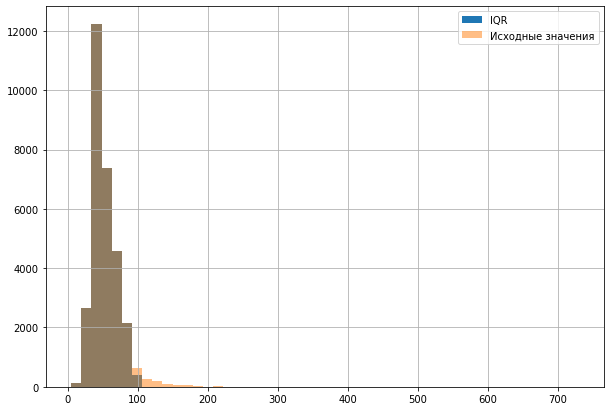

In [28]:
plot_column_info(train, 'full_sq', bins=50)

Всего значений: 7662
Пустых значений: 1
25-й перцентиль: 39.2, 75-й перцентиль: 63.3, IQR: 24.099999999999994,
Границы значений: [10.0, 403.0],
Границы выбросов: [3.0500000000000114, 99.44999999999999].
Есть выбросы.


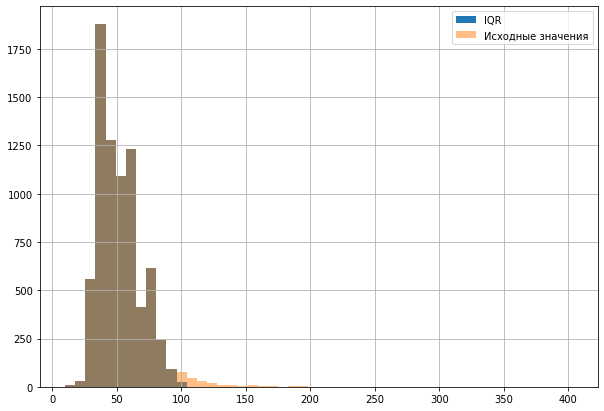

In [29]:
plot_column_info(test, 'full_sq', 50)

Пустых значений нет, но есть очень маленькие - 0, и очень большие - 5326. Посмотрим внимательнее


### step 2. Абсолютные значения life_sq

Всего значений: 30448
Пустых значений: 6797
25-й перцентиль: 20.0, 75-й перцентиль: 43.0, IQR: 23.0,
Границы значений: [7.0, 802.0],
Границы выбросов: [-14.5, 77.5].
Есть выбросы.


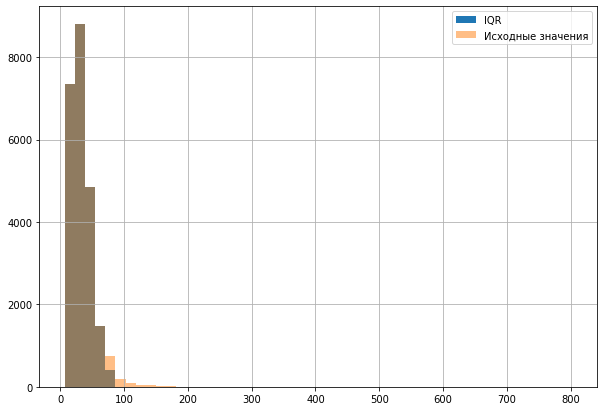

In [30]:
plot_column_info(train, 'life_sq', bins=50)

Всего значений: 7662
Пустых значений: 1506
25-й перцентиль: 20.7, 75-й перцентиль: 42.6325, IQR: 21.9325,
Границы значений: [8.1, 283.0],
Границы выбросов: [-12.19875, 75.53125].
Есть выбросы.


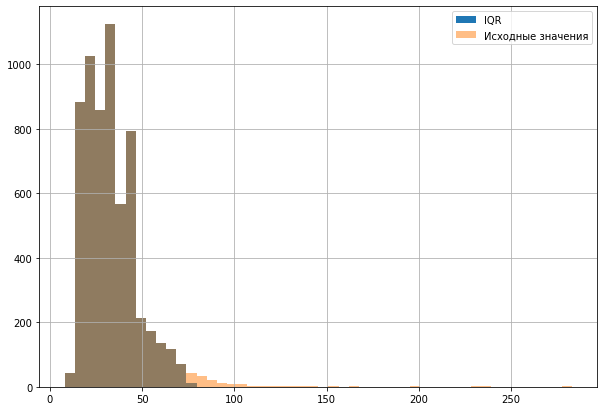

In [31]:
plot_column_info(test, 'life_sq', bins=50)

### step 3. Абсолютные значения kitch_sq

Всего значений: 30448
Пустых значений: 15789
25-й перцентиль: 6.0, 75-й перцентиль: 10.0, IQR: 4.0,
Границы значений: [2.0, 123.0],
Границы выбросов: [0.0, 16.0].
Есть выбросы.


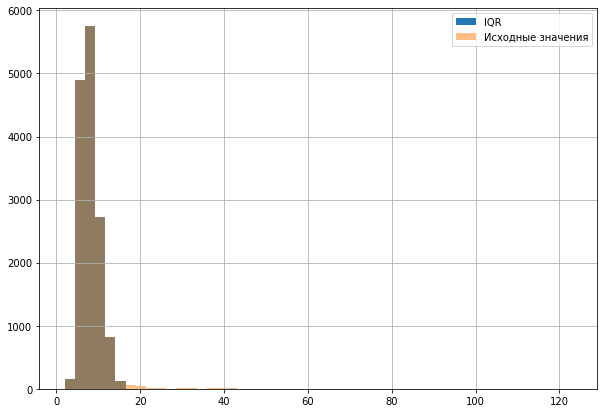

In [32]:
plot_column_info(train, 'kitch_sq', bins=50)

Всего значений: 7662
Пустых значений: 2130
25-й перцентиль: 6.3, 75-й перцентиль: 10.0, IQR: 3.7,
Границы значений: [1.1, 116.7],
Границы выбросов: [0.7499999999999991, 15.55].
Есть выбросы.


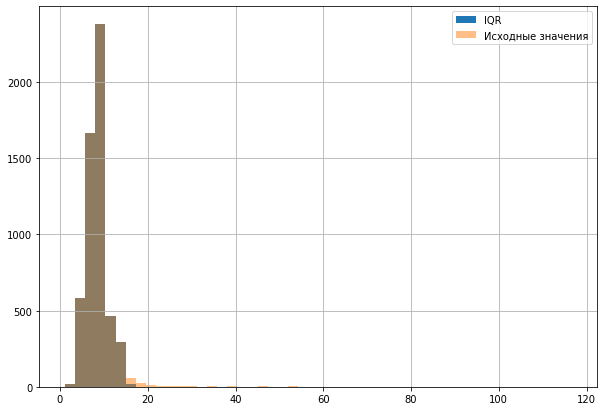

In [33]:
plot_column_info(test, 'kitch_sq', bins=50)

### step 4. Проверка факта, что сумма площадей life_sq и kitch_sq не превышает общей full_sq

Всего значений: 30448
Пустых значений: 0
25-й перцентиль: 10.0, 75-й перцентиль: 31.0, IQR: 21.0,
Границы значений: [-2014.0, 685.0],
Границы выбросов: [-21.5, 62.5].
Есть выбросы.


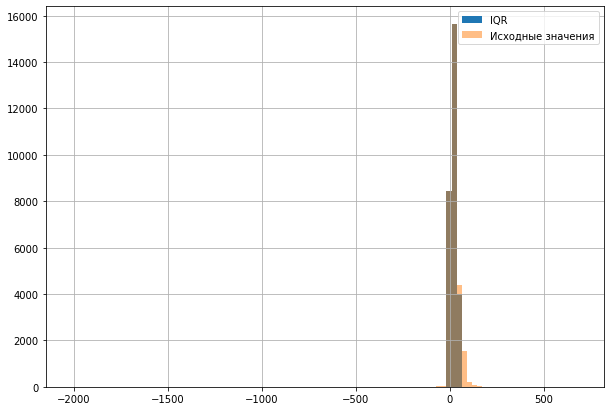

In [34]:
plot_column_info(train, 'delta_area_sq', 100)

### step 5. Соотношение площадей life_sq и kitch_sq к общей full_sq

Всего значений: 20219
Пустых значений: 0
25-й перцентиль: 0.5194805194805194, 75-й перцентиль: 0.627906976744186, IQR: 0.10842645726366662,
Границы значений: [0.0, 0.8181818181818182],
Границы выбросов: [0.3568408335850195, 0.790546662639686].
Есть выбросы.


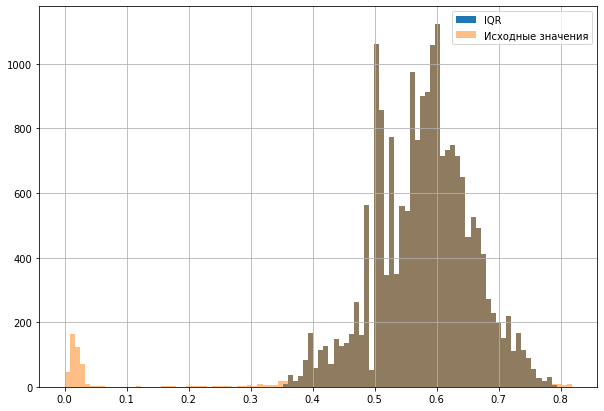

In [35]:
plot_column_info(train.query('rate_life_to_full_sq < 0.82'), 'rate_life_to_full_sq', 100)

Всего значений: 20820
Пустых значений: 0
25-й перцентиль: 0.025, 75-й перцентиль: 0.1724137931034483, IQR: 0.1474137931034483,
Границы значений: [0.0, 0.9736842105263158],
Границы выбросов: [-0.19612068965517246, 0.39353448275862074].
Есть выбросы.


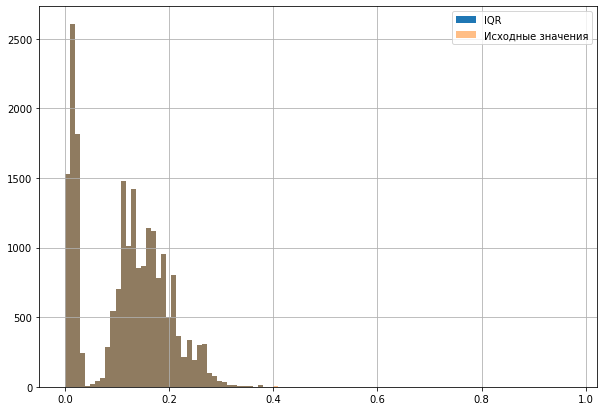

In [36]:
plot_column_info(train.query('rate_kitch_to_full_sq < 1'), 'rate_kitch_to_full_sq', 100)

Всего значений: 7639
Пустых значений: 0
25-й перцентиль: 0.027925160569673275, 75-й перцентиль: 0.1870374243057955, IQR: 0.15911226373612222,
Границы значений: [0.0, 0.758957654723127],
Границы выбросов: [-0.21074323503451006, 0.42570581990997886].
Есть выбросы.


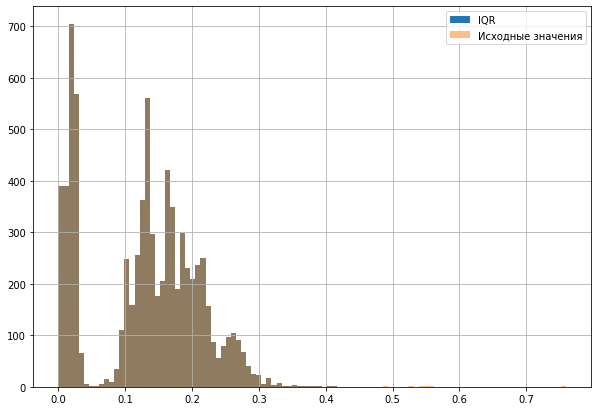

In [37]:
plot_column_info(test.query('rate_kitch_to_full_sq < 1'), 'rate_kitch_to_full_sq', 100)

### step 6. Количество комнат и средняя площадь комнаты

Всего значений: 30448
Пустых значений: 9588
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,
Границы значений: [1.0, 9.0],
Границы выбросов: [-0.5, 3.5].
Есть выбросы.


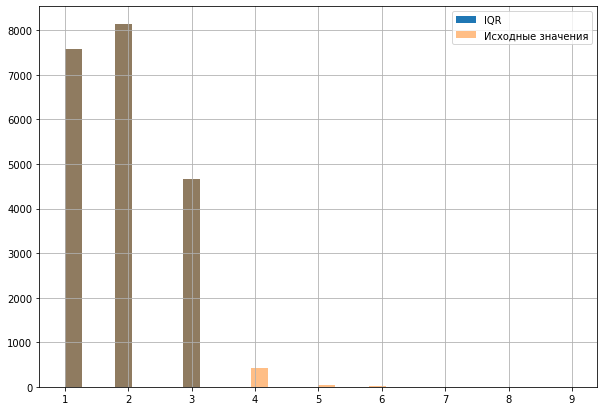

In [38]:
plot_column_info(train, 'num_room', 30)

Всего значений: 7662
Пустых значений: 1
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,
Границы значений: [1.0, 7.0],
Границы выбросов: [-0.5, 3.5].
Есть выбросы.


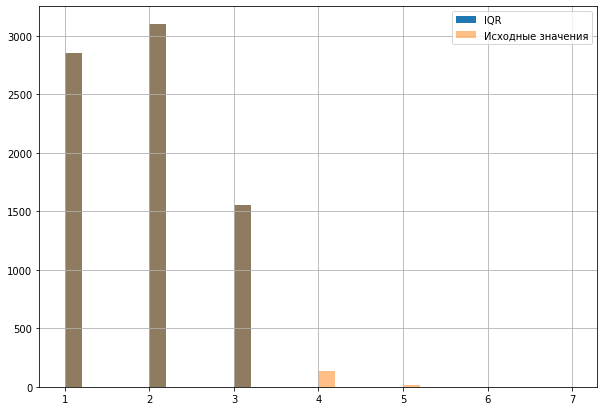

In [39]:
plot_column_info(test, 'num_room', 30)

Всего значений: 29
Пустых значений: 0
25-й перцентиль: 11.333333333333334, 75-й перцентиль: 14.0, IQR: 2.666666666666666,
Границы значений: [10.333333333333334, 14.666666666666666],
Границы выбросов: [7.333333333333335, 18.0].
Выбросов Нет.


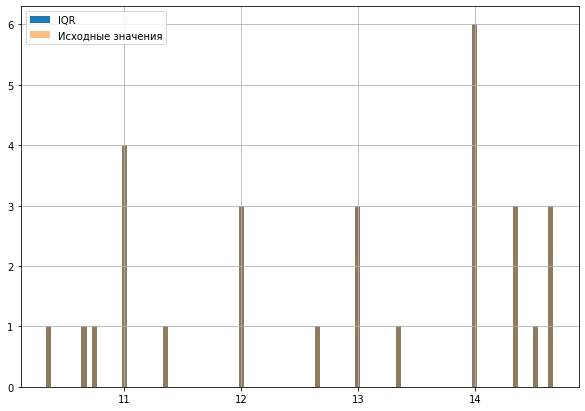

In [40]:
plot_column_info(train.query('mean_room_sq < 15'), 'mean_room_sq', 100)

Всего значений: 5
Пустых значений: 0
25-й перцентиль: 10.066666666666666, 75-й перцентиль: 14.0, IQR: 3.9333333333333336,
Границы значений: [10.0, 14.8],
Границы выбросов: [4.166666666666666, 19.9].
Выбросов Нет.


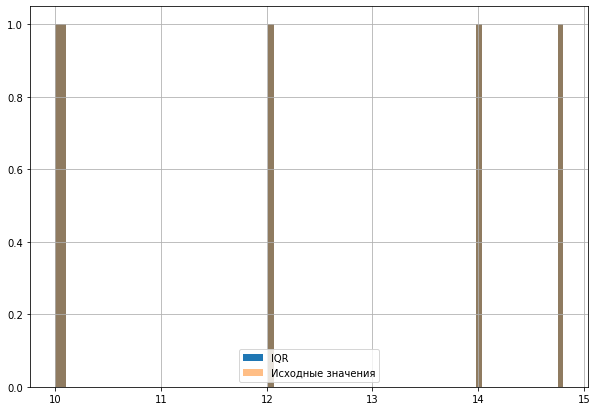

In [41]:
plot_column_info(test.query('mean_room_sq < 15'), 'mean_room_sq', 100)

## Посмотрим на связанные признаки floor и max_floor

Всего значений: 30448
Пустых значений: 175
25-й перцентиль: 3.0, 75-й перцентиль: 11.0, IQR: 8.0,
Границы значений: [1.0, 77.0],
Границы выбросов: [-9.0, 23.0].
Есть выбросы.


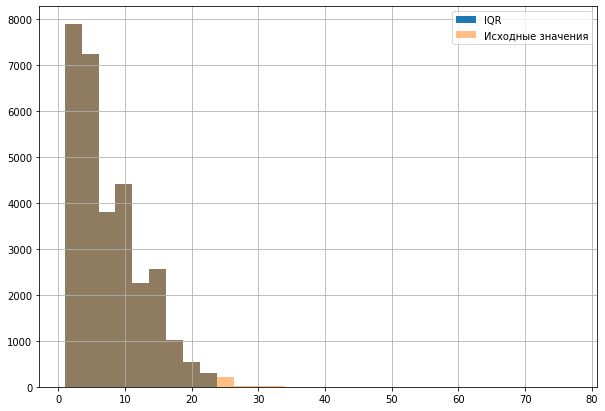

In [42]:
plot_column_info(train, 'floor_number', 30)

Всего значений: 7662
Пустых значений: 0
25-й перцентиль: 4.0, 75-й перцентиль: 11.0, IQR: 7.0,
Границы значений: [1.0, 41.0],
Границы выбросов: [-6.5, 21.5].
Есть выбросы.


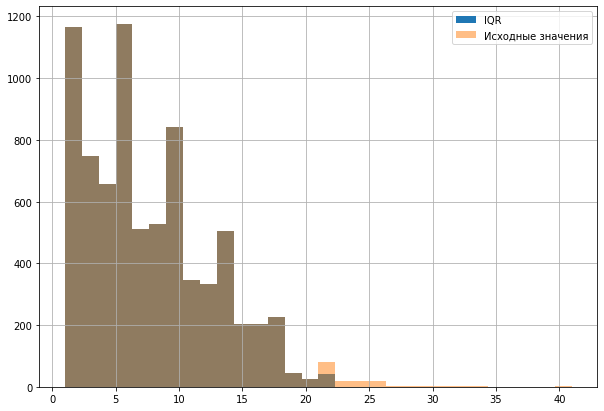

In [43]:
plot_column_info(test, 'floor_number', 30)

Всего значений: 30448
Пустых значений: 10120
25-й перцентиль: 9.0, 75-й перцентиль: 17.0, IQR: 8.0,
Границы значений: [1.0, 117.0],
Границы выбросов: [-3.0, 29.0].
Есть выбросы.


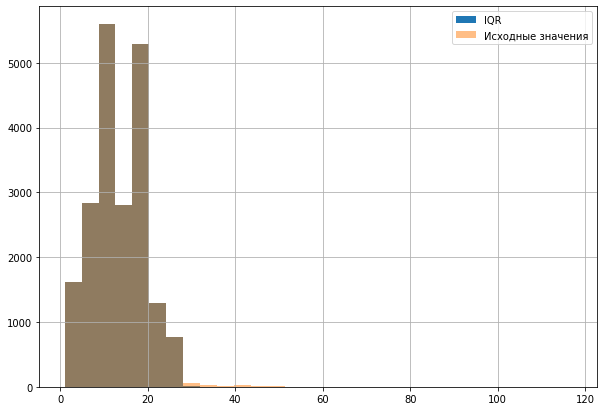

In [44]:
plot_column_info(train, 'max_floor', 30)

Всего значений: 7662
Пустых значений: 233
25-й перцентиль: 9.0, 75-й перцентиль: 17.0, IQR: 8.0,
Границы значений: [1.0, 48.0],
Границы выбросов: [-3.0, 29.0].
Есть выбросы.


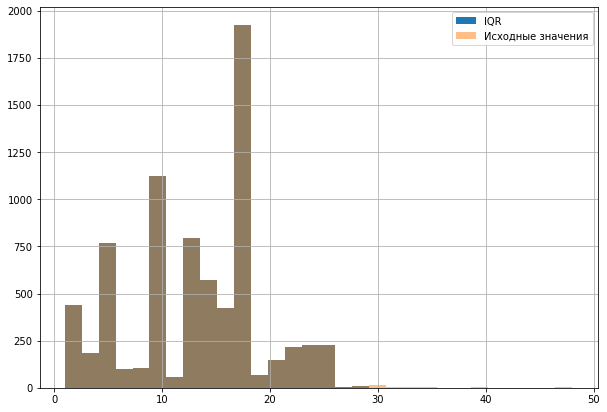

In [45]:
plot_column_info(test, 'max_floor', 30)

Всего значений: 30448
Пустых значений: 11064
25-й перцентиль: 0.3333333333333333, 75-й перцентиль: 0.8125, IQR: 0.4791666666666667,
Границы значений: [0.0, 1.0],
Границы выбросов: [-0.3854166666666667, 1.53125].
Выбросов Нет.


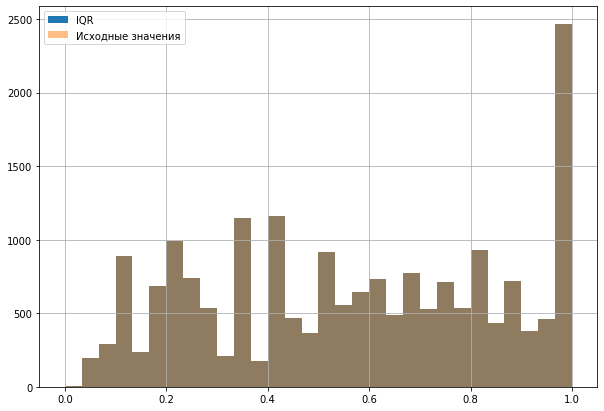

In [46]:
plot_column_info(train, 'rate_floor_to_max_floor', 30)

Всего значений: 7662
Пустых значений: 643
25-й перцентиль: 0.3333333333333333, 75-й перцентиль: 0.8, IQR: 0.46666666666666673,
Границы значений: [0.04, 1.0],
Границы выбросов: [-0.36666666666666675, 1.5].
Выбросов Нет.


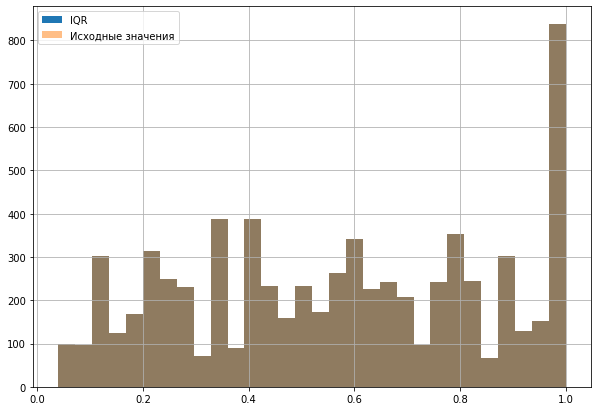

In [47]:
plot_column_info(test, 'rate_floor_to_max_floor', 30)

## Посмотрим на временные признаки timestamp и build_year

In [48]:
train['timestamp'].min(), train['timestamp'].max()

(Timestamp('2011-08-20 00:00:00'), Timestamp('2015-06-30 00:00:00'))

In [49]:
test['timestamp'].min(), test['timestamp'].max()

(Timestamp('2015-07-01 00:00:00'), Timestamp('2016-05-30 00:00:00'))

Всего значений: 30448
Пустых значений: 14490
25-й перцентиль: 1968.0, 75-й перцентиль: 2006.0, IQR: 38.0,
Границы значений: [1691.0, 2018.0],
Границы выбросов: [1911.0, 2063.0].
Есть выбросы.


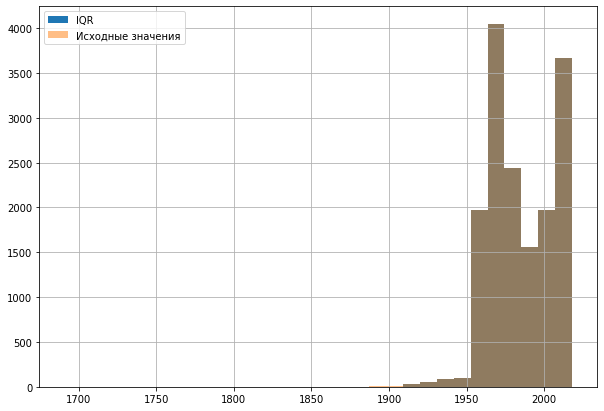

In [50]:
plot_column_info(train, 'build_year', 30)

Всего значений: 7662
Пустых значений: 1606
25-й перцентиль: 1969.0, 75-й перцентиль: 2013.0, IQR: 44.0,
Границы значений: [1875.0, 2019.0],
Границы выбросов: [1903.0, 2079.0].
Есть выбросы.


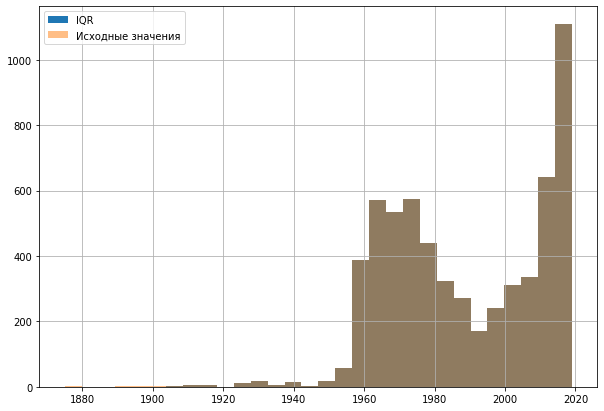

In [51]:
plot_column_info(test, 'build_year', 30)

Всего значений: 202
Пустых значений: 0
25-й перцентиль: 1917.0, 75-й перцентиль: 1935.0, IQR: 18.0,
Границы значений: [1691.0, 1943.0],
Границы выбросов: [1890.0, 1962.0].
Есть выбросы.


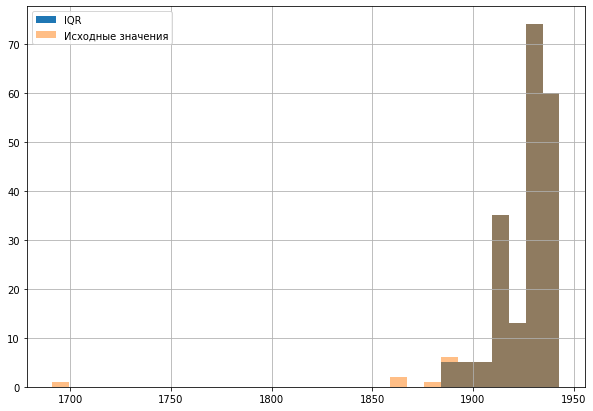

In [52]:
plot_column_info(train.query('build_year < 1945'), 'build_year', 30)

## Посмотрим на категориальные признаки 

In [53]:
column_info(train, 'material')

Проведем анализ для переменной material
Тип данных:  float64
Всего значений: 30448
Пустых значений: 9571
Значений, упомянутых более 10 раз: 5
Уникальных значений: 6


material
1.0     14177
2.0      2993
5.0      1561
4.0      1342
6.0       803
3.0         1

In [54]:
column_info(test, 'material')

Проведем анализ для переменной material
Тип данных:  int64
Всего значений: 7662
Пустых значений: 0
Значений, упомянутых более 10 раз: 5
Уникальных значений: 6


material
1      5241
2       958
4       619
5       487
6       356
3         1

In [55]:
column_info(train, 'state')

Проведем анализ для переменной state
Тип данных:  float64
Всего значений: 30448
Пустых значений: 13559
Значений, упомянутых более 10 раз: 4
Уникальных значений: 4


state
2.0   5844
3.0   5787
1.0   4836
4.0    422

In [56]:
column_info(test, 'state')

Проведем анализ для переменной state
Тип данных:  float64
Всего значений: 7662
Пустых значений: 694
Значений, упомянутых более 10 раз: 4
Уникальных значений: 4


state
2.0   2662
1.0   2266
3.0   1913
4.0    127

In [57]:
column_info(train, 'product_type')

Проведем анализ для переменной product_type
Тип данных:  object
Всего значений: 30448
Пустых значений: 0
Значений, упомянутых более 10 раз: 2
Уникальных значений: 2


product_type
Investment            19448
OwnerOccupier         11000

In [58]:
column_info(test, 'product_type')

Проведем анализ для переменной product_type
Тип данных:  object
Всего значений: 7662
Пустых значений: 33
Значений, упомянутых более 10 раз: 2
Уникальных значений: 2


product_type
Investment             4998
OwnerOccupier          2631

В признаке product_type в TEST есть пустые значения, а в TRAIN их нет, поэтому может быть проблема в данном месте

In [59]:
column_info(train, 'sub_area')

Проведем анализ для переменной sub_area
Тип данных:  object
Всего значений: 30448
Пустых значений: 0
Значений, упомянутых более 10 раз: 138
Уникальных значений: 146


sub_area
Poselenie Sosenskoe           1776
Nekrasovka                    1608
Poselenie Vnukovskoe          1371
Poselenie Moskovskij           924
Poselenie Voskresenskoe        708
Mitino                         678
Tverskoe                       677
Krjukovo                       518
Mar'ino                        508
Poselenie Filimonkovskoe       496

In [60]:
column_info(test, 'sub_area')

Проведем анализ для переменной sub_area
Тип данных:  object
Всего значений: 7662
Пустых значений: 0
Значений, упомянутых более 10 раз: 127
Уникальных значений: 145


sub_area
Poselenie Vnukovskoe         584
Poselenie Sosenskoe          297
Solncevo                     285
Nagatinskij Zaton            244
Poselenie Moskovskij         229
Tverskoe                     181
Mitino                       173
Poselenie Desjonovskoe       167
Zapadnoe Degunino            146
Mar'ino                      125

In [61]:
test['metro_min_walk'].min(), test['metro_min_walk'].max()

(0.086598221, 699.1584818)

In [62]:
print(pd.qcut(train['metro_min_walk'], q=[0, .2, .4, .6, .8, 1], precision=1).cat.categories)
print(pd.qcut(test['metro_min_walk'], q=[0, .2, .4, .6, .8, 1], precision=1).cat.categories)

IntervalIndex([(-0.1, 9.7], (9.7, 16.3], (16.3, 25.1], (25.1, 57.7], (57.7, 711.2]], dtype='interval[float64, right]')
IntervalIndex([(-0.010000000000000009, 9.7], (9.7, 15.4], (15.4, 23.3], (23.3, 51.0], (51.0, 699.2]], dtype='interval[float64, right]')


In [63]:
cut_labels = ['Diamond', 'Platinum', 'Gold', 'Silver', 'Bronze']
cut_bins = [-1, 10, 17, 25, 60, 720]

ser_1 = pd.cut(train['metro_min_walk'], bins=cut_bins, labels=cut_labels)
ser_1
ser_2 = pd.cut(test['metro_min_walk'], bins=cut_bins, labels=cut_labels)
ser_2

0        Diamond
1         Silver
2       Platinum
3         Bronze
4           Gold
          ...   
7657    Platinum
7658      Bronze
7659    Platinum
7660    Platinum
7661    Platinum
Name: metro_min_walk, Length: 7662, dtype: category
Categories (5, object): ['Diamond' < 'Platinum' < 'Gold' < 'Silver' < 'Bronze']

In [64]:
ser_1.value_counts(normalize=True)

Platinum    0.211649
Diamond     0.208329
Silver      0.204023
Bronze      0.197778
Gold        0.178220
Name: metro_min_walk, dtype: float64

In [65]:
ser_2.value_counts(normalize=True)

Platinum    0.226796
Diamond     0.213818
Gold        0.200052
Bronze      0.189040
Silver      0.170294
Name: metro_min_walk, dtype: float64

In [66]:
column_info(train, 'metro_id_and_min_walk')

Проведем анализ для переменной metro_id_and_min_walk
Тип данных:  object
Всего значений: 30448
Пустых значений: 0
Значений, упомянутых более 10 раз: 448
Уникальных значений: 694


metro_id_and_min_walk
45_(60, 720]                    1824
206_(60, 720]                   1507
108_(25, 60]                    1015
29_(60, 720]                     762
21_(25, 60]                      747
45_(25, 60]                      704
120_(10, 17]                     602
108_(-1, 10]                     559
21_(17, 25]                      549
132_(60, 720]                    538

In [67]:
column_info(test, 'metro_id_and_min_walk')

Проведем анализ для переменной metro_id_and_min_walk
Тип данных:  object
Всего значений: 7662
Пустых значений: 0
Значений, упомянутых более 10 раз: 179
Уникальных значений: 604


metro_id_and_min_walk
45_(60, 720]                     395
206_(60, 720]                    311
21_(25, 60]                      215
21_(60, 720]                     202
2_(25, 60]                       200
21_(17, 25]                      194
132_(60, 720]                    192
72_(17, 25]                      174
120_(10, 17]                     163
40_(25, 60]                      152

In [68]:
column_info(train, 'sub_area_and_metro_min_walk')

Проведем анализ для переменной sub_area_and_metro_min_walk
Тип данных:  object
Всего значений: 30448
Пустых значений: 0
Значений, упомянутых более 10 раз: 384
Уникальных значений: 469


sub_area_and_metro_min_walk
Poselenie Sosenskoe_(60, 720]                              1768
Nekrasovka_(25, 60]                                        1015
Poselenie Moskovskij_(60, 720]                              743
Poselenie Vnukovskoe_(25, 60]                               729
Poselenie Voskresenskoe_(25, 60]                            624
Tverskoe_(10, 17]                                           621
Nekrasovka_(-1, 10]                                         559
Krjukovo_(60, 720]                                          518
Poselenie Vnukovskoe_(17, 25]                               512
Poselenie Filimonkovskoe_(60, 720]                          496

In [69]:
column_info(test, 'sub_area_and_metro_min_walk')

Проведем анализ для переменной sub_area_and_metro_min_walk
Тип данных:  object
Всего значений: 7662
Пустых значений: 0
Значений, упомянутых более 10 раз: 223
Уникальных значений: 443


sub_area_and_metro_min_walk
Poselenie Sosenskoe_(60, 720]                             280
Poselenie Vnukovskoe_(25, 60]                             214
Nagatinskij Zaton_(25, 60]                                193
Poselenie Vnukovskoe_(60, 720]                            192
Poselenie Vnukovskoe_(17, 25]                             176
Solncevo_(17, 25]                                         176
Tverskoe_(10, 17]                                         172
Poselenie Desjonovskoe_(60, 720]                          167
Poselenie Moskovskij_(60, 720]                            162
Zapadnoe Degunino_(25, 60]                                131

## Посмотрим на целевой признак

In [70]:
train.query('price_doc > 60000000')[features]

id  full_sq  life_sq  kitch_sq  num_room  floor_number  max_floor  \
2118    2121     55.0     31.0       NaN       NaN          12.0        NaN   
3402    3405    172.0    115.0       NaN       NaN           4.0        NaN   
3557    3560    157.0     89.0       NaN       NaN          15.0        NaN   
5728    5731    210.0      NaN       NaN       NaN           4.0        NaN   
6319    6322    206.0    128.0       NaN       NaN           2.0        NaN   
7457    7460    185.0     66.0       NaN       NaN          33.0        NaN   
11085  11088    132.0     76.0      12.0       4.0          16.0       28.0   
12111  12114    167.0     97.0      15.0       4.0           5.0       18.0   
13866  13869    183.0     98.0      17.0       4.0           5.0       15.0   
16099  16102    120.0     63.0      17.0       3.0          15.0       20.0   
18337  18340    168.0      NaN       NaN       3.0           5.0        5.0   
19095  19098    184.0     85.0      54.0       1.0          10.0       47.0   
22778  22781    151.0     82.0      14.0       4.0           3.0        6.0   
25183  25186    216.0    121.0      20.0       4.0          27.0       30.0   
27460  27463    151.0      NaN       NaN       4.0          15.0        1.0   
28326  28329    220.0    144.0      17.0       9.0           3.0        5.0   
29656  29659    211.0    162.0      19.0       6.0           5.0        5.0   

       build_year  state   product_type  price_doc  
2118          NaN    NaN     Investment  111111112  
3402          NaN    NaN     Investment   61950000  
3557          NaN    NaN     Investment   77000000  
5728          NaN    NaN  OwnerOccupier   71033632  
6319          NaN    NaN     Investment   78802248  
7457          NaN    NaN     Investment   91066096  
11085      2006.0    NaN     Investment   71200000  
12111      2001.0    4.0     Investment   65000000  
13866      2010.0    1.0     Investment   64000000  
16099      2002.0    4.0     Investment   65000000  
18337         NaN    NaN  OwnerOccupier   69818672  
19095      2004.0    4.0     Investment   80777440  
22778      1900.0    4.0     Investment   61072000  
25183      2003.0    4.0     Investment   64000000  
27460      2015.0    1.0  OwnerOccupier   71249624  
28326      1927.0    3.0     Investment   95122496  
29656      1914.0    3.0     Investment   70000000

Всего значений: 30448
Пустых значений: 0
25-й перцентиль: 4740002.0, 75-й перцентиль: 8300000.0, IQR: 3559998.0,
Границы значений: [100000, 111111112],
Границы выбросов: [-599995.0, 13639997.0].
Есть выбросы.


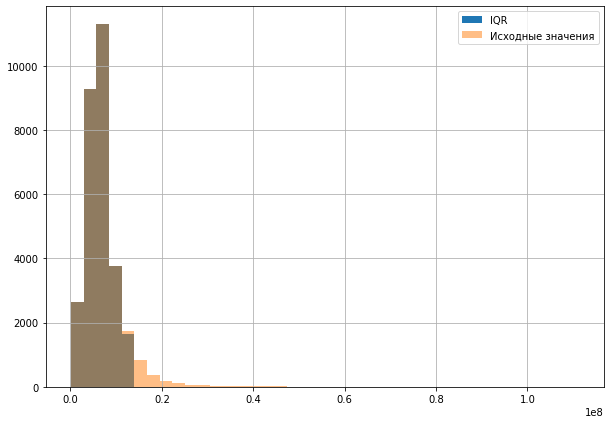

In [71]:
plot_column_info(train.query('price_doc > 0'), 'price_doc', 40)

Всего значений: 7
Пустых значений: 0
25-й перцентиль: 540530.303030303, 75-й перцентиль: 1008420.0, IQR: 467889.696969697,
Границы значений: [532545.9405940594, 2020202.0363636364],
Границы выбросов: [-161304.24242424255, 1710254.5454545454].
Есть выбросы.


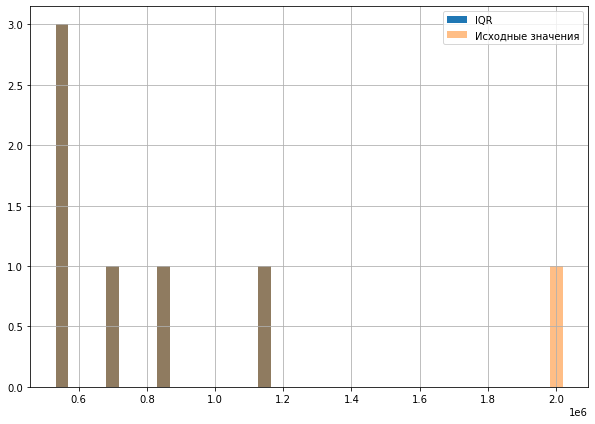

In [72]:
plot_column_info(train.query('price_doc_sqm > 500000'), 'price_doc_sqm', 40)

In [73]:
train.query('price_doc_sqm > 500000')[features + ['price_doc_sqm']]

id  full_sq  life_sq  kitch_sq  num_room  floor_number  max_floor  \
1188    1189      9.0     44.0       NaN       NaN           3.0        NaN   
2009    2012      5.0     40.0       NaN       NaN           5.0        NaN   
2118    2121     55.0     31.0       NaN       NaN          12.0        NaN   
6112    6115      6.0      NaN       NaN       NaN           3.0        NaN   
11085  11088    132.0     76.0      12.0       4.0          16.0       28.0   
16099  16102    120.0     63.0      17.0       3.0          15.0       20.0   
24856  24859    101.0      NaN       NaN       2.0          15.0        NaN   

       build_year  state   product_type  price_doc  price_doc_sqm  
1188          NaN    NaN     Investment    6300000   7.000000e+05  
2009          NaN    NaN     Investment    5770000   1.154000e+06  
2118          NaN    NaN     Investment  111111112   2.020202e+06  
6112          NaN    NaN  OwnerOccupier    5177040   8.628400e+05  
11085      2006.0    NaN     Investment   71200000   5.393939e+05  
16099      2002.0    4.0     Investment   65000000   5.416667e+05  
24856         NaN    NaN  OwnerOccupier   53787140   5.325459e+05

In [74]:
train.query('full_sq != full_sq')[features + ['price_doc_sqm']]

Empty DataFrame
Columns: [id, full_sq, life_sq, kitch_sq, num_room, floor_number, max_floor, build_year, state, product_type, price_doc, price_doc_sqm]
Index: []

In [75]:
test.query('full_sq != full_sq')[features + ['price_doc_sqm']]

id  full_sq  life_sq  kitch_sq  num_room  floor_number  max_floor  \
6350  36824      NaN      NaN       2.0       2.0           5.0        5.0   

      build_year  state   product_type  price_doc  price_doc_sqm  
6350         NaN    1.0  OwnerOccupier          0              0

In [76]:
train.sample(5)

id  timestamp  full_sq  life_sq  floor_number  max_floor  material  \
11296  11299 2013-10-17     39.0     19.0          16.0       16.0       5.0   
25265  25268 2014-11-25     74.0      NaN          12.0       25.0       1.0   
1070    1071 2012-02-04     37.0     19.0           3.0        NaN       NaN   
22042  22045 2014-09-01     57.0     56.0           7.0       14.0       1.0   
20635  20638 2014-07-07     81.0     81.0          19.0       20.0       6.0   

       build_year  num_room  kitch_sq  state   product_type  \
11296      1979.0       1.0       9.0    3.0     Investment   
25265         NaN       3.0       NaN    1.0  OwnerOccupier   
1070          NaN       NaN       NaN    NaN     Investment   
22042      2008.0       2.0      11.0    3.0     Investment   
20635      2012.0       2.0       NaN    1.0  OwnerOccupier   

                       sub_area        area_m  raion_popul  green_zone_part  \
11296  Orehovo-Borisovo Juzhnoe  7.128794e+06       145576         0.075790   
25265                Nekrasovka  1.139168e+07        19940         0.055644   
1070   Orehovo-Borisovo Juzhnoe  7.128794e+06       145576         0.075790   
22042        Juzhnoe Medvedkovo  3.879802e+06        81980         0.157332   
20635                  Strogino  1.675112e+07       155427         0.338151   

       indust_part  children_preschool  preschool_quota  \
11296     0.100456                5594           4792.0   
25265     0.243205                1706           2395.0   
1070      0.100456                5594           4792.0   
22042     0.232205                4926           2200.0   
20635     0.041125                9254           4606.0   

       preschool_education_centers_raion  children_school  school_quota  \
11296                                  7             7227       11178.0   
25265                                  5             1564        7377.0   
1070                                   7             7227       11178.0   
22042                                  4             4860        6476.0   
20635                                  8             9515       11032.0   

       school_education_centers_raion  school_education_centers_top_20_raion  \
11296                               7                                      1   
25265                               5                                      0   
1070                                7                                      1   
22042                               4                                      1   
20635                               9                                      0   

       hospital_beds_raion  healthcare_centers_raion  university_top_20_raion  \
11296                  NaN                         1                        0   
25265                540.0                         0                        0   
1070                   NaN                         1                        0   
22042                 80.0                         0                        0   
20635                  NaN                         1                        0   

       sport_objects_raion  additional_education_raion culture_objects_top_25  \
11296                    7                           2                     no   
25265                    0                           4                     no   
1070                     7                           2                     no   
22042                    4                           2                     no   
20635                    6                           2                     no   

       culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
11296                             0                       6             0   
25265                             0                       0             0   
1070                              0                       6             0   
22042                             0                       3             1   
20635                        

In [77]:
test.sample(5)

id  timestamp  full_sq  life_sq  floor_number  max_floor  material  \
7298  37772 2016-04-22    59.78      NaN          12.0       17.0         1   
4425  34899 2016-01-28    39.00     23.8           4.0        5.0         2   
3682  34156 2016-01-09    61.60      NaN          10.0       17.0         1   
1673  32147 2015-10-10    34.70     19.3          16.0       16.0         1   
5829  36303 2016-03-02    73.80     40.8          13.0       14.0         1   

      build_year  num_room  kitch_sq  state   product_type  \
7298         NaN       2.0       NaN    1.0  OwnerOccupier   
4425      1959.0       2.0       5.2    2.0     Investment   
3682         NaN       2.0       NaN    1.0  OwnerOccupier   
1673      1977.0       1.0       9.6    3.0     Investment   
5829      1992.0       3.0       8.2    2.0     Investment   

                       sub_area        area_m  raion_popul  green_zone_part  \
7298       Ochakovo-Matveevskoe  1.752651e+07       118843         0.133373   
4425                Presnenskoe  1.163805e+07       123280         0.068202   
3682       Poselenie Moskovskij  4.036700e+07        21819         0.492840   
1673  Orehovo-Borisovo Severnoe  7.462270e+06       129207         0.387100   
5829                Novogireevo  4.395333e+06        94561         0.063755   

      indust_part  children_preschool  preschool_quota  \
7298     0.309479                7454           1830.0   
4425     0.042032                7125           3240.0   
3682     0.075779                1497              NaN   
1673     0.007720                4669           3648.0   
5829     0.038693                6120           2215.0   

      preschool_education_centers_raion  children_school  school_quota  \
7298                                  2             7715        6484.0   
4425                                  7             6856       10602.0   
3682                                  0             1437           NaN   
1673                                  6             4788        6587.0   
5829                                  4             6533        5824.0   

      school_education_centers_raion  school_education_centers_top_20_raion  \
7298                               3                                      0   
4425                               9                                      0   
3682                               0                                      0   
1673                               6                                      0   
5829                               4                                      0   

      hospital_beds_raion  healthcare_centers_raion  university_top_20_raion  \
7298                990.0                         0                        0   
4425               1940.0                         2                        1   
3682                  NaN                         0                        0   
1673                  NaN                         0                        0   
5829               1015.0                         2                        0   

      sport_objects_raion  additional_education_raion culture_objects_top_25  \
7298                    7                           3                     no   
4425                   29                           2                    yes   
3682                    3                           3                     no   
1673                    4                           2                     no   
5829                    7                           1                     no   

      culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
7298                             0                       6             4   
4425                             3                       5            84   
3682                             0                       2             3   
1673                             0                       4             2   
5829                             0                       5             1   

# Base-line

In [78]:
# Выгрузим данные
train, test, sample_submission = load_data_frames()

# Добавим новые признаки
train = add_new_features(train)
test = add_new_features(test)

# Почистим данные
train = clean_data(train, data_type='TRAIN')
test = clean_data(test, data_type='TEST')

# Добавим новый цедлевой признак
train = add_new_target(train, data_type='TRAIN')
test = add_new_target(test, data_type='TEST')

#train = clean_data_by_target(train, 'price_doc_sqm')

Выгрузим данные
Добавим новые признаки
Добавим новые признаки
Почистим данные
В данные TRAIN внесем коррективы, по условию full_sq > 1000
Удалим строки, подходящие под это условие:
	-было строк 30471
	-стало строк 30470
В данные TRAIN внесем коррективы, по условию (full_sq == 1 and life_sq == 1) or (full_sq == 0 and life_sq == 0)
Удалим строки, подходящие под это условие:
	-было строк 30470
	-стало строк 30449
В данные TRAIN внесем коррективы, по условию life_sq > 1000
Удалим строки, подходящие под это условие:
	-было строк 30449
	-стало строк 30448
Добавим в TRAIN новый признак full_sq_is_bad
В данные TRAIN внесем коррективы, по условию full_sq < 5
Проставим 1-цу в признак full_sq_is_bad
Занулим признак full_sq
Добавим в TRAIN новый признак life_sq_is_bad
В данные TRAIN внесем коррективы, по условию life_sq < 5
Проставим 1-цу в признак life_sq_is_bad
Занулим признак life_sq
Добавим в TRAIN новый признак kitch_sq_is_bad
В данные TRAIN внесем коррективы, по условию kitch_sq > 200
Проста

# Base-line + очистка данных:

Base-line rmsle: 0.49285


<AxesSubplot:>

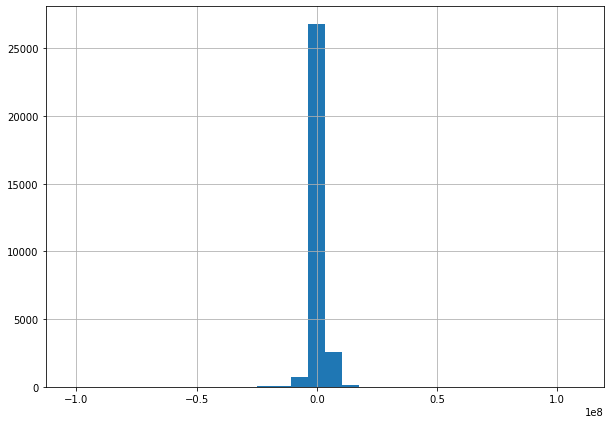

In [79]:
grb = train[['sub_area', 'full_sq', 'price_doc', 'price_doc_sqm']].copy()
grb = grb.groupby('sub_area')['price_doc_sqm'].mean()
global_mean = train['price_doc'].mean()

train['price_doc_predict'] = train['sub_area'].map(grb) * train['full_sq']
train['price_doc_predict'] = train['price_doc_predict'].fillna(global_mean)

print(f"Base-line rmsle: {(mean_squared_log_error(train['price_doc'] , train['price_doc_predict'])**0.5):.5f}")

ser = train['price_doc_predict'] - train['price_doc'] 
ser.hist(bins=30)

In [80]:
test['price_doc'] = test['sub_area'].map(grb) * test['full_sq']
test['price_doc'] = test['price_doc'].fillna(global_mean)

sample_submission['price_doc'] = test['price_doc']
print('Save baseline submission')
sample_submission.to_csv('baseline_submission.csv', index=False)

Save baseline submission


## Base-line + mean target encoder + очистка данных:

In [81]:
column = 'sub_area_and_metro_min_walk'
column_mean_target = column + '_mean_target'
column_target = 'price_doc_sqm'

encoder = mean_target_smooth_encoder()
encoder.fit(train, column, column_target)
global_mean = train['price_doc'].mean()

test[column_mean_target] = encoder.transform(test, column)


train[column_mean_target] = encoder.transform(train, column)
train['price_doc_predict'] = train[column_mean_target] * train['full_sq']
train['price_doc_predict'] = train['price_doc_predict'].fillna(global_mean)

print(f"Base-line rmsle: {(mean_squared_log_error(train['price_doc'] , train['price_doc_predict'])**0.5):.5f}")

test[column_mean_target] = encoder.transform(test, column)
test['price_doc_predict'] = test[column_mean_target] * test['full_sq']
test['price_doc_predict'] = test['price_doc_predict'].fillna(global_mean)

sample_submission['price_doc'] = test['price_doc_predict']
print('Save baseline submission')
sample_submission.to_csv('baseline_mean_target_submission.csv', index=False)

Base-line rmsle: 0.48549
Save baseline submission


**Промежуточный итог**

1. Base-line + очистка данных:
 - Train rmsle: 0.49285
 - SUBMIT: 0.33391
 
 
2. Base-line + очистка данных + очистка данных по таргету:
 - Train rmsle: 0.18355
 - SUBMIT: 0.34478
 
 
3. Base-line + mean target encoder + очистка данных:
 - Train rmsle: 0.48549
 - SUBMIT: 0.33263

# CatBoostRegressor

In [82]:
info_cols, bin_cols, cat_cols, num_cols, del_cols, target_cols = get_columns(train.columns)

# Выгрузим данные и проведем очистку
train, test, sample_submission = load_and_clean_data()

Выгрузим данные
Добавим новые признаки
Добавим новые признаки
Почистим данные
В данные TRAIN внесем коррективы, по условию full_sq > 1000
Удалим строки, подходящие под это условие:
	-было строк 30471
	-стало строк 30470
В данные TRAIN внесем коррективы, по условию (full_sq == 1 and life_sq == 1) or (full_sq == 0 and life_sq == 0)
Удалим строки, подходящие под это условие:
	-было строк 30470
	-стало строк 30449
В данные TRAIN внесем коррективы, по условию life_sq > 1000
Удалим строки, подходящие под это условие:
	-было строк 30449
	-стало строк 30448
Добавим в TRAIN новый признак full_sq_is_bad
В данные TRAIN внесем коррективы, по условию full_sq < 5
Проставим 1-цу в признак full_sq_is_bad
Занулим признак full_sq
Добавим в TRAIN новый признак life_sq_is_bad
В данные TRAIN внесем коррективы, по условию life_sq < 5
Проставим 1-цу в признак life_sq_is_bad
Занулим признак life_sq
Добавим в TRAIN новый признак kitch_sq_is_bad
В данные TRAIN внесем коррективы, по условию kitch_sq > 200
Проста

## Две модели

### 1. Investment model

In [83]:
# Сделаем предобработку и разбиение
X, X_sub, y = prepare_and_split_data(train, test, 'price_doc_sqm', encoding_type='catboost', product_type='Investment') # TARGET_NAME

# Разобъем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

# Выделим из обучающей выборки еще и валидационную выборку 
CB_X_train, CB_X_val, CB_y_train, CB_y_val = train_test_split(X_train, y_train, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

In [84]:
#%%script false --no-raise-error

# initialize Pool
train_pool = Pool(CB_X_train, label=np.log(CB_y_train + 1), cat_features=cat_cols)
val_pool = Pool(CB_X_val, label=np.log(CB_y_val + 1), cat_features=cat_cols)

# Инициализация модели
model_investment = CatBoostRegressor(
    iterations = 1500,
    #depth=10,
    #learning_rate = 0.5,
    random_seed = RANDOM_SEED,
    eval_metric='RMSE',
    custom_metric=['MAPE', 'MAE'],
    od_wait=500,
    #task_type='GPU',
)
# Fit
model_investment.fit(
    train_pool,
    eval_set=val_pool,
    verbose_eval=100,
    use_best_model=True,
    plot=True
)

# metrics
display_metric(model_investment, CB_X_train, CB_y_train, 'TRAIN')
display_metric(model_investment, CB_X_val, CB_y_val, 'VALIDATION')
display_metric(model_investment, X_test, y_test, 'TEST')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.057503
0:	learn: 0.2456899	test: 0.2444310	best: 0.2444310 (0)	total: 114ms	remaining: 2m 51s
100:	learn: 0.1587098	test: 0.1670873	best: 0.1670873 (100)	total: 5.05s	remaining: 1m 9s
200:	learn: 0.1491400	test: 0.1637177	best: 0.1637177 (200)	total: 10.2s	remaining: 1m 6s
300:	learn: 0.1407317	test: 0.1623717	best: 0.1623541 (292)	total: 15.1s	remaining: 1m
400:	learn: 0.1338053	test: 0.1616318	best: 0.1616318 (400)	total: 20.1s	remaining: 55s
500:	learn: 0.1281270	test: 0.1615438	best: 0.1615085 (446)	total: 25s	remaining: 49.8s
600:	learn: 0.1232575	test: 0.1614704	best: 0.1614597 (518)	total: 29.9s	remaining: 44.7s
700:	learn: 0.1180665	test: 0.1614902	best: 0.1614136 (627)	total: 35.1s	remaining: 40s
800:	learn: 0.1136614	test: 0.1616896	best: 0.1614136 (627)	total: 40s	remaining: 34.9s
900:	learn: 0.1098800	test: 0.1618604	best: 0.1614136 (627)	total: 45.5s	remaining: 30.3s
1000:	learn: 0.1062970	test: 0.1622120	best: 0.1614136 (627)	total: 50.8s	remaining:

In [85]:
train_pool = Pool(X_train, label=np.log(y_train + 1), cat_features=cat_cols)
val_pool = Pool(X_test, label=np.log(y_test + 1), cat_features=cat_cols)

# Инициализация модели
model_investment = CatBoostRegressor(
    iterations = 1500,
    #depth=10,
    #learning_rate = 0.5,
    random_seed = RANDOM_SEED,
    eval_metric='RMSE',
    custom_metric=['MAPE', 'MAE'],
    od_wait=500,
    #task_type='GPU',
)
# Fit
model_investment.fit(
    train_pool,
    eval_set=val_pool,
    verbose_eval=100,
    use_best_model=True,
    plot=True
)

# metrics
display_metric(model_investment, X_train, y_train, 'TRAIN')
display_metric(model_investment, X_test, y_test, 'TEST')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.059554
0:	learn: 0.2449420	test: 0.2417028	best: 0.2417028 (0)	total: 68.2ms	remaining: 1m 42s
100:	learn: 0.1583630	test: 0.1588165	best: 0.1588165 (100)	total: 5.45s	remaining: 1m 15s
200:	learn: 0.1488275	test: 0.1548531	best: 0.1548531 (200)	total: 10.9s	remaining: 1m 10s
300:	learn: 0.1411352	test: 0.1535463	best: 0.1535301 (295)	total: 16.6s	remaining: 1m 6s
400:	learn: 0.1356770	test: 0.1530063	best: 0.1529679 (394)	total: 22.5s	remaining: 1m 1s
500:	learn: 0.1306533	test: 0.1524475	best: 0.1524337 (499)	total: 28.3s	remaining: 56.5s
600:	learn: 0.1264878	test: 0.1520704	best: 0.1520704 (600)	total: 34.1s	remaining: 51.1s
700:	learn: 0.1226824	test: 0.1519188	best: 0.1518963 (689)	total: 40.3s	remaining: 45.9s
800:	learn: 0.1188886	test: 0.1519233	best: 0.1518222 (756)	total: 46.1s	remaining: 40.2s
900:	learn: 0.1155515	test: 0.1520119	best: 0.1518222 (756)	total: 52.4s	remaining: 34.9s
1000:	learn: 0.1120608	test: 0.1520434	best: 0.1518222 (756)	total: 58

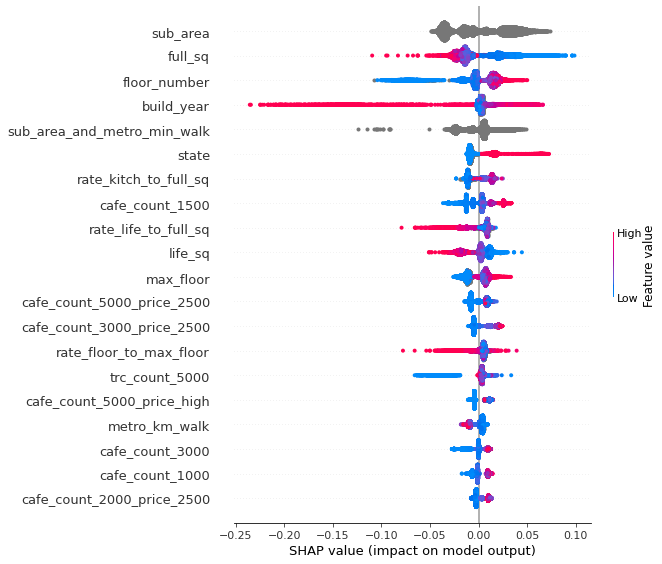

In [86]:
inspected_model = model_investment
X = pd.concat([X_train, X_test], axis=0)

explainer = shap.TreeExplainer(inspected_model)
shap_values = explainer.shap_values(X)

# summarize the effects of all the features
shap.summary_plot(shap_values, X)

### 2. OwnerOccupier model

In [87]:
# Сделаем предобработку и разбиение
X, X_sub, y = prepare_and_split_data(train, test, 'price_doc_sqm', encoding_type='catboost', product_type='OwnerOccupier') # TARGET_NAME

# Разобъем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

# Выделим из обучающей выборки еще и валидационную выборку 
CB_X_train, CB_X_val, CB_y_train, CB_y_val = train_test_split(X_train, y_train, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

In [88]:
#%%script false --no-raise-error

# initialize Pool
train_pool = Pool(CB_X_train, label=np.log(CB_y_train + 1), cat_features=cat_cols)
val_pool = Pool(CB_X_val, label=np.log(CB_y_val + 1), cat_features=cat_cols)

# Инициализация модели
model_owneroccupier = CatBoostRegressor(
    iterations = 1500,
    #depth=10,
    #learning_rate = 0.5,
    random_seed = RANDOM_SEED,
    eval_metric='RMSE',
    custom_metric=['MAPE', 'MAE'],
    od_wait=500,
    #task_type='GPU',
)
# Fit
model_owneroccupier.fit(
    train_pool,
    eval_set=val_pool,
    verbose_eval=100,
    use_best_model=True,
    plot=True
)

# metrics
display_metric(model_owneroccupier, CB_X_train, CB_y_train, 'TRAIN')
display_metric(model_owneroccupier, CB_X_val, CB_y_val, 'VALIDATION')
display_metric(model_owneroccupier, X_test, y_test, 'TEST')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.053885
0:	learn: 0.2878723	test: 0.2948454	best: 0.2948454 (0)	total: 57.3ms	remaining: 1m 25s
100:	learn: 0.0954381	test: 0.1061271	best: 0.1061271 (100)	total: 4.08s	remaining: 56.5s
200:	learn: 0.0825514	test: 0.0955172	best: 0.0955172 (200)	total: 7.82s	remaining: 50.5s
300:	learn: 0.0746345	test: 0.0911098	best: 0.0911098 (300)	total: 11.7s	remaining: 46.6s
400:	learn: 0.0693874	test: 0.0887974	best: 0.0887974 (400)	total: 15.6s	remaining: 42.7s
500:	learn: 0.0653150	test: 0.0873652	best: 0.0873617 (499)	total: 19.4s	remaining: 38.7s
600:	learn: 0.0615894	test: 0.0863256	best: 0.0863256 (600)	total: 23.3s	remaining: 34.9s
700:	learn: 0.0583433	test: 0.0855686	best: 0.0855686 (700)	total: 27.4s	remaining: 31.2s
800:	learn: 0.0556832	test: 0.0849745	best: 0.0849623 (797)	total: 31.8s	remaining: 27.7s
900:	learn: 0.0533592	test: 0.0845698	best: 0.0845623 (892)	total: 35.7s	remaining: 23.8s
1000:	learn: 0.0512561	test: 0.0842778	best: 0.0842645 (996)	total: 40.3

In [89]:
train_pool = Pool(X_train, label=np.log(y_train + 1), cat_features=cat_cols)
val_pool = Pool(X_test, label=np.log(y_test + 1), cat_features=cat_cols)


# Инициализация модели
model_owneroccupier = CatBoostRegressor(
    iterations = 1500,
    #depth=10,
    #learning_rate = 0.5,
    random_seed = RANDOM_SEED,
    eval_metric='RMSE',
    custom_metric=['MAPE', 'MAE'],
    od_wait=500,
    #task_type='GPU',
)
# Fit
model_owneroccupier.fit(
    train_pool,
    eval_set=val_pool,
    verbose_eval=100,
    use_best_model=True,
    plot=True
)

# metrics
display_metric(model_owneroccupier, X_train, y_train, 'TRAIN')
display_metric(model_owneroccupier, X_test, y_test, 'TEST')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.055807
0:	learn: 0.2884758	test: 0.2845436	best: 0.2845436 (0)	total: 52.9ms	remaining: 1m 19s
100:	learn: 0.0944035	test: 0.0979754	best: 0.0979754 (100)	total: 4.34s	remaining: 1m
200:	learn: 0.0822752	test: 0.0884357	best: 0.0884357 (200)	total: 8.53s	remaining: 55.1s
300:	learn: 0.0751283	test: 0.0837222	best: 0.0837222 (300)	total: 12.6s	remaining: 50.4s
400:	learn: 0.0706584	test: 0.0813761	best: 0.0813761 (400)	total: 16.8s	remaining: 45.9s
500:	learn: 0.0668278	test: 0.0795590	best: 0.0795590 (500)	total: 21s	remaining: 41.9s
600:	learn: 0.0635145	test: 0.0784599	best: 0.0784599 (600)	total: 25.2s	remaining: 37.7s
700:	learn: 0.0607371	test: 0.0775606	best: 0.0775606 (700)	total: 29.5s	remaining: 33.6s
800:	learn: 0.0585216	test: 0.0769768	best: 0.0769768 (800)	total: 34.1s	remaining: 29.8s
900:	learn: 0.0565504	test: 0.0764693	best: 0.0764693 (900)	total: 38.4s	remaining: 25.5s
1000:	learn: 0.0546443	test: 0.0760782	best: 0.0760782 (1000)	total: 42.7s	re

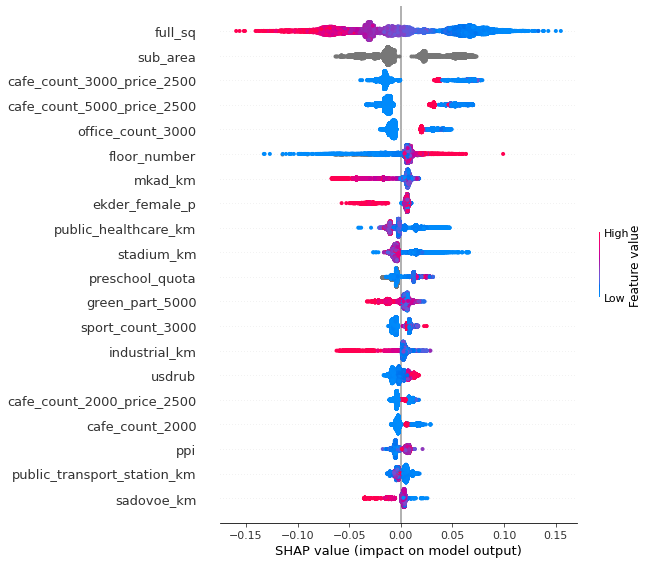

In [90]:
inspected_model = model_owneroccupier
X = pd.concat([X_train, X_test], axis=0)

explainer = shap.TreeExplainer(inspected_model)
shap_values = explainer.shap_values(X)

# summarize the effects of all the features
shap.summary_plot(shap_values, X)

### 3. Union models

In [91]:
# Сделаем предобработку и разбиение
X, X_sub, y = prepare_and_split_data(train, test, 'price_doc_sqm', encoding_type='catboost', product_type='all') # TARGET_NAME

# Разобъем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

# Выделим из обучающей выборки еще и валидационную выборку 
CB_X_train, CB_X_val, CB_y_train, CB_y_val = train_test_split(X_train, y_train, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

In [92]:
model_columns = X_sub.columns

index_0 = X_test[X_test['product_type'] == 0].index
X_test.loc[index_0, 'y_pred'] = np.exp(model_investment.predict(X_test.loc[index_0, model_columns])) - 1

index_1 = X_test[X_test['product_type'] == 1].index
X_test.loc[index_1, 'y_pred'] = np.exp(model_owneroccupier.predict(X_test.loc[index_1, model_columns])) - 1

print(f"TEST rmsle: {(mean_squared_log_error(y_test, X_test['y_pred'])**0.5):.5f}")

TEST rmsle: 0.10475


In [93]:
# Submit

index_0 = X_sub[X_sub['product_type'] == 0].index
X_sub.loc[index_0, 'y_pred'] = np.exp(model_investment.predict(X_sub.loc[index_0, model_columns])) - 1
index_1 = X_sub[X_sub['product_type'] == 1].index
X_sub.loc[index_1, 'y_pred'] = np.exp(model_owneroccupier.predict(X_sub.loc[index_1, model_columns])) - 1

sub_predict_catboost = X_sub['y_pred']
sub_predict_catboost = (sub_predict_catboost * X_sub['full_sq']).fillna(global_mean)
sample_submission['price_doc'] = sub_predict_catboost

print('Save catboost submission')
sample_submission.to_csv('two_models_catboost_submission.csv', index=False)

Save catboost submission


## Single model

In [94]:
# Сделаем предобработку и разбиение
X, X_sub, y = prepare_and_split_data(train, test, 'price_doc_sqm', encoding_type='catboost', product_type='Investment') # TARGET_NAME

# Разобъем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

# Выделим из обучающей выборки еще и валидационную выборку 
CB_X_train, CB_X_val, CB_y_train, CB_y_val = train_test_split(X_train, y_train, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

In [95]:
#%%script false --no-raise-error

# initialize Pool
train_pool = Pool(CB_X_train, label=np.log(CB_y_train + 1), cat_features=cat_cols)
val_pool = Pool(CB_X_val, label=np.log(CB_y_val + 1), cat_features=cat_cols)

# Инициализация модели
model = CatBoostRegressor(
    iterations = 1500,
    #depth=10,
    #learning_rate = 0.5,
    random_seed = RANDOM_SEED,
    eval_metric='RMSE',
    custom_metric=['MAPE', 'MAE'],
    od_wait=500,
    #task_type='GPU',
)
# Fit
model.fit(
    train_pool,
    eval_set=val_pool,
    verbose_eval=100,
    use_best_model=True,
    plot=True
)

# metrics
display_metric(model, CB_X_train, CB_y_train, 'TRAIN')
display_metric(model, CB_X_val, CB_y_val, 'VALIDATION')
display_metric(model, X_test, y_test, 'TEST')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.057503
0:	learn: 0.2456899	test: 0.2444310	best: 0.2444310 (0)	total: 61.7ms	remaining: 1m 32s
100:	learn: 0.1587098	test: 0.1670873	best: 0.1670873 (100)	total: 5.47s	remaining: 1m 15s
200:	learn: 0.1491400	test: 0.1637177	best: 0.1637177 (200)	total: 10.7s	remaining: 1m 9s
300:	learn: 0.1407317	test: 0.1623717	best: 0.1623541 (292)	total: 16s	remaining: 1m 3s
400:	learn: 0.1338053	test: 0.1616318	best: 0.1616318 (400)	total: 21.7s	remaining: 59.4s
500:	learn: 0.1281270	test: 0.1615438	best: 0.1615085 (446)	total: 27.1s	remaining: 54s
600:	learn: 0.1232575	test: 0.1614704	best: 0.1614597 (518)	total: 32.4s	remaining: 48.5s
700:	learn: 0.1180665	test: 0.1614902	best: 0.1614136 (627)	total: 37.4s	remaining: 42.6s
800:	learn: 0.1136614	test: 0.1616896	best: 0.1614136 (627)	total: 42.6s	remaining: 37.2s
900:	learn: 0.1098800	test: 0.1618604	best: 0.1614136 (627)	total: 47.8s	remaining: 31.8s
1000:	learn: 0.1062970	test: 0.1622120	best: 0.1614136 (627)	total: 53.2s	r

In [96]:
train_pool = Pool(X_train, label=np.log(y_train + 1), cat_features=cat_cols)
val_pool = Pool(X_test, label=np.log(y_test + 1), cat_features=cat_cols)


# Инициализация модели
model = CatBoostRegressor(
    iterations = 1500,
    #depth=10,
    #learning_rate = 0.5,
    random_seed = RANDOM_SEED,
    eval_metric='RMSE',
    custom_metric=['MAPE', 'MAE'],
    od_wait=500,
    #task_type='GPU',
)
# Fit
model.fit(
    train_pool,
    eval_set=val_pool,
    verbose_eval=100,
    use_best_model=True,
    plot=True
)

# metrics
display_metric(model, X_train, y_train, 'TRAIN')
display_metric(model, X_test, y_test, 'TEST')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.059554
0:	learn: 0.2449420	test: 0.2417028	best: 0.2417028 (0)	total: 67.5ms	remaining: 1m 41s
100:	learn: 0.1583630	test: 0.1588165	best: 0.1588165 (100)	total: 5.53s	remaining: 1m 16s
200:	learn: 0.1488275	test: 0.1548531	best: 0.1548531 (200)	total: 10.9s	remaining: 1m 10s
300:	learn: 0.1411352	test: 0.1535463	best: 0.1535301 (295)	total: 16.2s	remaining: 1m 4s
400:	learn: 0.1356770	test: 0.1530063	best: 0.1529679 (394)	total: 21.4s	remaining: 58.8s
500:	learn: 0.1306533	test: 0.1524475	best: 0.1524337 (499)	total: 27.3s	remaining: 54.4s
600:	learn: 0.1264878	test: 0.1520704	best: 0.1520704 (600)	total: 33.1s	remaining: 49.6s
700:	learn: 0.1226824	test: 0.1519188	best: 0.1518963 (689)	total: 38.6s	remaining: 44s
800:	learn: 0.1188886	test: 0.1519233	best: 0.1518222 (756)	total: 44s	remaining: 38.4s
900:	learn: 0.1155515	test: 0.1520119	best: 0.1518222 (756)	total: 49.5s	remaining: 32.9s
1000:	learn: 0.1120608	test: 0.1520434	best: 0.1518222 (756)	total: 55s	re

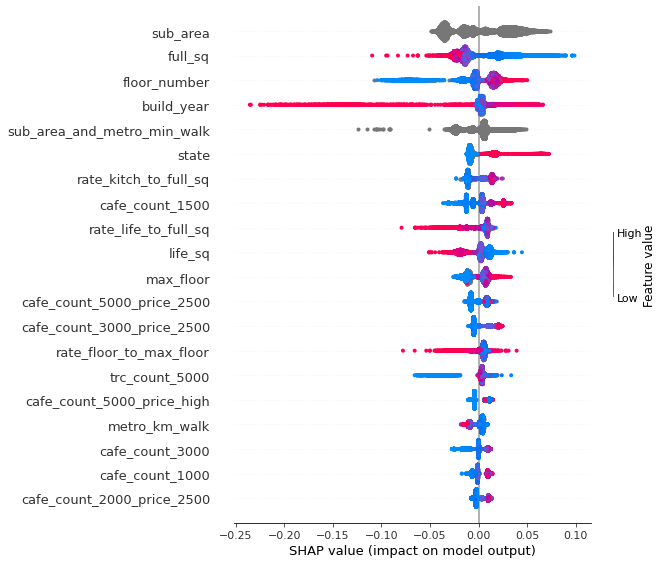

In [97]:
inspected_model = model
X = pd.concat([X_train, X_test], axis=0)

explainer = shap.TreeExplainer(inspected_model)
shap_values = explainer.shap_values(X)

# summarize the effects of all the features
shap.summary_plot(shap_values, X)

In [98]:
VERSION = 'v01'
SAVE_MODEL_FULL_PATH_JSON = f'./sber_housing_market_model_{VERSION}.json'
SAVE_DATA_PATH = f'./sber_housing_market_data_{VERSION}.csv'


def save_model_with_metadata(model, model_path):
    # Добавим метаданные
    model.get_metadata()['model_version'] = VERSION
    model.get_metadata()['model_type'] = 'CatBoostRegressor'
    model.get_metadata()['model_description'] = f'Model for predicting the price per square meter in the Moscow'
    
    # Сохраним модель
    model.save_model(model_path, format='json')

In [99]:
# Сохраним модель
save_model_with_metadata(model, SAVE_MODEL_FULL_PATH_JSON)

# Сохраним данные
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)
df = pd.concat([X, y], axis=1)

df.to_csv(SAVE_DATA_PATH, index=False)

In [100]:
#%%script false --no-raise-error
# Submit

sub_predict_catboost = np.exp(model.predict(X_sub)) - 1
sub_predict_catboost = (sub_predict_catboost * X_sub['full_sq']).fillna(global_mean)
sample_submission['price_doc'] = sub_predict_catboost
print('Save catboost submission')
sample_submission.to_csv('catboost_submission.csv', index=False)

Save catboost submission


**Промежуточный итог**

1. CatBoostRegressor + без очистки данных + (label + one-hot encoder):
 - TRAIN rmsle: 0.4214
 - TEST rmsle: 0.4558
 - SUBMIT: 0.34420


2. CatBoostRegressor + очистка данных + catboost encoder:
 - (1) TRAIN rmsle: 0.38744
 - (1) VALIDATION rmsle: 0.46114
 - (1) TEST rmsle: 0.44619
 - (2) TRAIN rmsle: 0.38534
 - (2)TEST rmsle: 0.44275
 - SUBMIT: 0.34204

 
3. CatBoostRegressor + очистка данных + (label + one-hot encoder)
 - (1) TRAIN rmsle: 0.41353
 - (1) VALIDATION rmsle: 0.46209
 - (1) TEST rmsle: 0.44649
 - (2) TRAIN rmsle: 0.40447
 - (2) TEST rmsle: 0.44437
 - SUBMIT: 0.33324
 
 
4. CatBoostRegressor + очистка данных + очистка данных по таргету + mean target encoder:
 - (1) TRAIN rmsle: 0.13528
 - (1) VALIDATION rmsle: 0.15749
 - (1) TEST rmsle: 0.15014
 - (2) TRAIN rmsle: 0.12139
 - (2) TEST rmsle: 0.14863
 - SUBMIT: 0.35691
 
 
5. CatBoostRegressor + очистка данных + очистка данных по таргету + mean target encoder + две модели:
 - [model_investment] (1)TRAIN rmsle: 0.13528
 - [model_investment] (1)VALIDATION rmsle: 0.15749
 - [model_investment] (1)TEST rmsle: 0.15014
 - [model_investment] (2)TRAIN rmsle: 0.12139
 - [model_investment] (2)TEST rmsle: 0.14863
 - [model_owneroccupier] (1)TRAIN rmsle: 0.04241
 - [model_owneroccupier] (1)VALIDATION rmsle: 0.08089
 - [model_owneroccupier] (1)TEST rmsle: 0.07406
 - [model_owneroccupier] (2)TRAIN rmsle: 0.04655
 - [model_owneroccupier] (2)TEST rmsle: 0.07341
 - [unified model] TEST rmsle: 0.11404
 - SUBMIT: 0.34321
 
 
6. CatBoostRegressor + очистка данных + очистка данных по таргету + catboost encoder:
 - (1) TRAIN rmsle: 0.12143
 - (1) VALIDATION rmsle: 0.16141
 - (1) TEST rmsle: 0.15244
 - (2) TRAIN rmsle: 0.12053
 - (2) TEST rmsle: 0.15182
 - SUBMIT: 0.35496


7. CatBoostRegressor + очистка данных + очистка данных по таргету + catboost encoder + две модели:
 - [model_investment] (1) TRAIN rmsle: 0.12143
 - [model_investment] (1) VALIDATION rmsle: 0.16141
 - [model_investment] (1) TEST rmsle: 0.15244
 - [model_investment] (2) TRAIN rmsle: 0.12053
 - [model_investment] (2) TEST rmsle: 0.15182
 - [model_owneroccupier] (1) TRAIN rmsle: 0.04363
 - [model_owneroccupier] (1) VALIDATION rmsle: 0.08357
 - [model_owneroccupier] (1) TEST rmsle: 0.07653
 - [model_owneroccupier] (2) TRAIN rmsle: 0.04754
 - [model_owneroccupier] (2) TEST rmsle: 0.07457
 - [unified model] TEST rmsle: 0.10475
 - SUBMIT: 0.33996



# SBER AutoML

In [101]:
%%script false --no-raise-error

# Определим вид
task = Task('reg', loss = 'rmsle', metric = 'rmsle')
roles = {
    'target': TARGET_NAME,
    'drop': ['id', 'timestamp'],
    #'category': cat_cols
}

# Определим данные для хадачи
train_data = pd.concat([X_train, y_train], axis=1)
test_data  = pd.concat([X_test, y_test], axis=1)

# Train AutoML
automl = TabularAutoML(
    task = task, 
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {
        'n_jobs': N_THREADS, 
        'cv': N_FOLDS, 
        'random_state': RANDOM_SEED
    }
)
oof_pred = automl.fit_predict(train_data, roles=roles, verbose=1)

train_predict_automl = oof_pred.data[:, 0].copy()
rmsle = mean_squared_log_error(y_train, train_predict_automl) ** 0.5
print(f"TRAIN rmsle: {rmsle}")

# Predict
test_predict_automl = automl.predict(X_test).data[:, 0]
rmsle = mean_squared_log_error(y_test, test_predict_automl) ** 0.5
print(f"TEST rmsle: {rmsle}")

In [102]:
%%script false --no-raise-error

# Определим вид
task = Task('reg', loss = 'rmsle', metric = 'rmsle')
roles = {
    'target': TARGET_NAME,
    'drop': ['id', 'timestamp'],
    #'category': cat_cols
}

# Определим данные для хадачи
#train_data = pd.concat([X_train, y_train], axis=1)
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)
train_data = pd.concat([X, y], axis=1)

# Train AutoML
automl = TabularAutoML(
    task = task, 
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {
        'n_jobs': N_THREADS, 
        'cv': N_FOLDS, 
        'random_state': RANDOM_SEED+1
    }
)
oof_pred = automl.fit_predict(train_data, roles=roles, verbose=1)

train_predict_automl = oof_pred.data[:, 0].copy()
rmsle = mean_squared_log_error(y, train_predict_automl) ** 0.5
print(f"TRAIN rmsle: {rmsle}")

# Predict
#test_predict_automl = automl.predict(X_test).data[:, 0]
#rmsle = mean_squared_log_error(y_test, test_predict_automl) ** 0.5
#print(f"TEST rmsle: {rmsle}")

In [103]:
%%script false --no-raise-error

# Submit. Predict on test to submit
sub_pred = automl.predict(X_sub)

# Save predictions    
sub_predict_automl = sub_pred.data[:, 0].copy()
sample_submission[TARGET_NAME] = sub_predict_automl
print('Save automl submission')
sample_submission.to_csv('LightAutoML_submission.csv', index = False)

**Промежуточный итог**

1. LightAutoML + без очистки данных + (label + one-hot encoder):
 - TRAIN rmsle: 0.4589
 - TEST rmsle: 0.4539
 - SUBMIT: 0.32630


2. LightAutoML + c очисткой данных + (label + one-hot encoder):
 - (1) TRAIN rmsle: 0.46108179766581664
 - (1) TEST rmsle: 0.44310016384028084
 - (2) TRAIN rmsle: 0.45672033710793936
 - SUBMIT: 0.32496

In [104]:
%%script false --no-raise-error

%%time

# Fast feature importances calculation - logged for better visual (size is dominated in normal scale)
fast_fi = automl.get_feature_scores('fast')[:30]
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (20, 10), grid = True)

## Дополнительные функции

Функция 1: CV loop регуляризация
Достаточно интуитивный и устойчивый метод для mean encoding. Данные разбиваются на фолды и значение для каждого фолда вычисляется на основе оставшихся фолдов. Таким образом не будет переобучения на текущем куске данных, т.к. вычисляемое среднее значение будет браться на остальном подмножестве данных. Обычно 4-5 фолдов достаточно.

In [105]:
# Для начала создадим дата фрейм с категориальной фичей
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
 

cities = ['C1', 'C1', 'C1', 'C2', 'C2', 'C3', 'C3', 'C3', 'C3', 'C3']
target = [1, 1, 0, 1, 0, 1, 1, 0, 0, 0]

cities_test = ['C1', 'C1', 'C2', 'C3', 'C3', 'C3']

df = pd.DataFrame()
df['cities'] = cities
df['target'] = target

df_test = pd.DataFrame()
df_test['cities'] = cities_test

In [106]:
def make_mean_encoding(df_tr, target_col_name, feature_col_name):
    y_tr = df_tr[target_col_name].values
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)
    train_new = df_tr.copy()
 
    global_mean = df_tr[target_col_name].mean()
    train_new[feature_col_name + '_mean_target'] = global_mean
 
    for tr_ind, val_ind in skf.split(y_tr, y_tr):
        X_tr, X_val = df_tr.iloc[tr_ind], df_tr.iloc[val_ind]
        for col in [feature_col_name]:
            means = X_val[col].map(X_tr.groupby(col)[target_col_name].mean())
            X_val[col + '_mean_target'] = means
        train_new.iloc[val_ind] = X_val
 
    # fill nan
    train_new.fillna(global_mean, inplace=True)
 
    return train_new
 
df_encoded = make_mean_encoding(df, 'target', 'cities')
print(df_encoded.head(10))

  cities  target  cities_mean_target
0     C1       1            1.000000
1     C1       1            0.500000
2     C1       0            1.000000
3     C2       1            0.500000
4     C2       0            0.500000
5     C3       1            0.333333
6     C3       1            0.333333
7     C3       0            0.333333
8     C3       0            0.500000
9     C3       0            0.333333


Функция 2: Регуляризация на основе размытия
Суть данной регуляризации в том, что мы доверяем большим категориям, с большим кол-вом значений и устанавливаем коэффициент недоверия к небольшим, слабопредставленным категориям. По сути говоря коэффициент alpha это размер группы, начиная с которой мы доверяем среднему значению

In [107]:
def make_mean_encoding_smooth(df_tr, target_col_name, feature_col_name):
    train_new = df_tr.copy()
    
    global_mean = df_tr[target_col_name].mean()
    encod_type = df_tr.groupby(by=[feature_col_name], as_index=False)[target_col_name].transform(np.mean).values
    nrows = df_tr.groupby(by=[feature_col_name], as_index=False)[target_col_name].transform(len).values
    alpha = 4
    train_new[feature_col_name + '_mean_target'] = (encod_type * nrows + global_mean * alpha) / (nrows + alpha)
    return train_new
 
df_encoded = make_mean_encoding_smooth(df, 'target', 'cities')
print(df_encoded.head(10))

  cities  target  cities_mean_target
0     C1       1            0.571429
1     C1       1            0.571429
2     C1       0            0.571429
3     C2       1            0.500000
4     C2       0            0.500000
5     C3       1            0.444444
6     C3       1            0.444444
7     C3       0            0.444444
8     C3       0            0.444444
9     C3       0            0.444444


# Итоги

Были подготовлены несколько моделей для пресказания цены квартиры:

 - Наивная модель, предсказывающая цену квартиры по району и растоянию до ближайшего метро
 - Модель градиентного бустанга с помощью CatBoost
 - Ансамбль моделей c помощью CatBoost
 - Ансамбль моделей c помощью LightAutoML

Для итогового ответа был использован ансамбль моделей. Метрика модели, определенная в рамках соревнования на kaggle, равна 0.32496 (приблизительно 1767 из 3216).


В рамках проекта погрузился в тему проекта и выполнил предобработку данных. По ее итогам был сделан ряд выводов:
 - Необходимо очень акуратно подходить к очистке данных в зависимости от поставленной задачи. В том числе и к оценке корректности целевой переменной.
 - Необходимо различать рынок новостроек и вторичного жилья.
 - Предсказывать лучше не цену квартиры, а цену квадратного метра.
 - Желательно внести признак, отвечающий за определение геопозиции - например район + расстояние до метро.
 - Желательно добавлять комбинации признаков, например знаю этаж и общую этажность зданий, добавить их отношение.
 - Необходимо аккуратно выбору энкодеров для категориальных признаков для различных моделей.







In [108]:
# 